<a id="top">

</a>
- [Overview](#overview)
- [Is Data Balanced or Umbalanced](#is-data-balanced-or-imbalanced)
- [Name Contract Type](#name-contract-type)
- [Code Gender](#code-gender)
- [Own Car/Own Realty](#own-car-own-realty)
- [Amount Income Total](#amount-income-total)
- [Amount Credit](#amount-credit)
- [Amount Annuity](#amount-annuity)
- [Amount Goods Orice](#amount-goods-price)
- [Name Type Suite](#name-type-suite)
- [Name Income Type](#name-income-type)
- [Name Educaiton Type](#name-education-type)
- [Name Family Status](#name-family-status)
- [Name Housing Type](#name-housing-type)
- [Region Population Relative](#region-population-relative)
- [Days Birth](#days-birth)
- [Days Employed](#days-employed)
- [Days Registration](#days-registration)
- [Days ID Publish](#days-id-publish)
- [Own Car Age](#own-car-age)
- [Flag Mobil](#flag-mobil)
- [Flag Emp Phone](#flag-emp-phone)
- [Flag Work Phone](#flag-work-phone)
- [Flag Cont Mobile](#flag-cont-mobile)
- [Flag Phone](#flag-phone)
- [Flag Email](#flag-email)
- [Occupation Type](#occupation-type)
- [Count Family Members](#cnt-fam-members)
- [Region Rating Client](#region-rating-client)
- [Region Rating Client w City](#region-rating-client-w-city)
- [Weekday Application Process Start](#weekday-appr-process-start)
- [Hour Application Process Start](#hour-appr-process-start)
- [Registry Region Does Not Match Live Region](#reg-region-not-live-region)
- [Registry Region Does Not Match Work Region](#reg-region-not-work-region)
- [Live Regsion Not Work Region](#live-region-not-work-region)
- [Registry City Does Not Match Live City](#reg-city-not-live-city)
- [Registry City Does Not Match Work City](#reg-city-not-work-city)
- [Organaization Type](#organization-type)
- [External Data Source 1](#ext-source-1)
- [External Data Source 2](#ext-source-2)
- [External Data Source 3](#ext-source-3)
- [External Data Soruce Pairplot](#ext-source-pairplot)
- [Apartments](#apartments)
- [Basement Area](#basementarea)
- [Years Beginexpluatation](#years-beginexpluatation)
- [Years Build](#years-build)
- [Common Area](#common-area)
- [Elevators](#elevators)
- [Entrances](#entrances)
- [Floors Max](#floors-max)
- [Floors Min](#floors-min)
- [Land Area](#land-area)
- [Living Apartments](#living-apartments)
- [Living Area](#living-area)
- [Non Living Apartments](#non-living-apartments)
- [Non Living Area](#non-living-area)
- [Fondkapremont](#fondkapremont)
- [House Type](#house-type)
- [Total Area](#total-area)
- [Walls Material](#walls-material)
- [Emergency State](#emergency-state)
- [Observation Days Past Due](#observation-days-past-due)
- [Observation Defaulted Days Past Due](#observation-defaulted-days-past-due)
- [Days Last Phone Change](#days-last-phone-change)
- [Flag Document](#flag-document)
- [Amount Request Credit Bureau Hour](#amt-req-credit-bureau-hour)
- [Amount Request Credit Bureau Day](#amt-req-credit-bureau-day)
- [Amount Request Credit Bureau Week](#amt-req-credit-bureau-week)
- [Amount Request Credit Bureau Month](#amt-req-credit-bureau-mon)
- [Amount Request Credit Bureau Quater](#amt-req-credit-bureau-qrt)
- [Amount Request Credit Bureau Year](#amt-req-credit-bureau-year)

## Prepare

In [1]:
import feather
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 999


app_trn = feather.read_dataframe('../input/application_train.feather')
app_tst = feather.read_dataframe('../input/application_test.feather')

def target_bar(col, title=None):

    df0 = app_trn[app_trn["TARGET"] == 0]
    df1 = app_trn[app_trn["TARGET"] == 1]

    t0 = df0[col].value_counts().rename(col + '0')
    t1 = df1[col].value_counts().rename(col + '1')
    t = pd.concat([t0, t1], axis=1).fillna(0).astype(int)
    t['total'] = t.sum(axis=1)
    t.sort_values('total', inplace=True, ascending=False)
    t.drop(columns=['total'], inplace=True)

    idx = np.arange(len(t))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))

    p1 = ax.bar(idx, t[col + '0'], width)
    p2 = ax.bar(idx+width, t[col + '1'], width)
    ax.legend((p1[0], p2[0]), ('Target=0', 'Target=1'))
    ax.set_title(title)
    ax.set_xticks(idx + width / 2)
    ax.set_xticklabels(t.index.values, rotation=45)

    plt.show()
    

def target_hist(col, title):

    df0 = app_trn[app_trn["TARGET"] == 0]
    df1 = app_trn[app_trn["TARGET"] == 1]

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    sns.distplot(df0[col].dropna(), ax=axes[0], color='b')
    axes[0].set_title('Target=0')
    sns.distplot(df1[col].dropna(), ax=axes[1], color='orange')
    axes[1].set_title('Target=1')
    fig.suptitle(title)
    plt.show()

<a id='overview'></a>
## Overview

In [2]:
app_trn.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
app_tst.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
app_trn.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_

In [5]:
app_trn.isnull().sum() / len(app_trn)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000039
AMT_GOODS_PRICE                 0.000904
NAME_TYPE_SUITE                 0.004201
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                     0.659908
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='is-data-balanced-or-imbalanced'></a>
## Is data balanced or imbalanced 

In [6]:
tmp = app_trn.TARGET.value_counts().to_frame('TARGET_value_counts')
tmp['TARGET_ratio'] = tmp.TARGET_value_counts / tmp.TARGET_value_counts.sum()
tmp

,TARGET_value_counts,TARGET_ratio
0,282686,0.919271
1,24825,0.080729


- 9:1くらいのimbalancedデータ

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='name-contract-type'></a>
## Name Contract Type

In [7]:
tmp = app_trn.NAME_CONTRACT_TYPE.value_counts().to_frame('NAME_CONTRACT_TYPE_value_counts')
tmp['NAME_CONTRACT_TYPE_ratio'] = tmp.NAME_CONTRACT_TYPE_value_counts / tmp.NAME_CONTRACT_TYPE_value_counts.sum()
tmp

,NAME_CONTRACT_TYPE_value_counts,NAME_CONTRACT_TYPE_ratio
Cash loans,278232,0.904787
Revolving loans,29279,0.095213


- これも9:1くらいで"Cash loans"

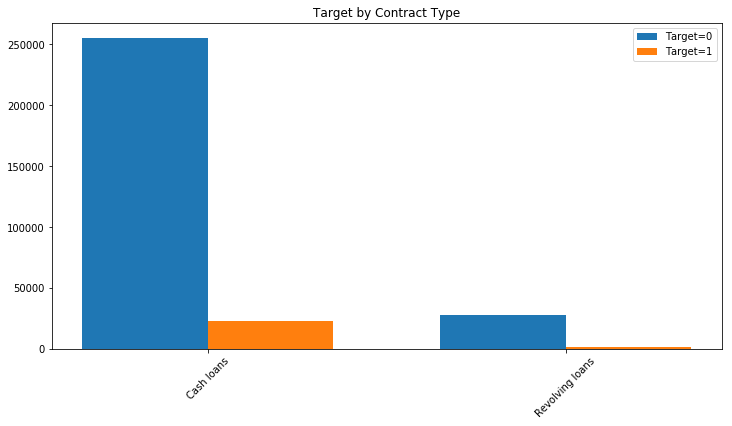

In [8]:
target_bar("NAME_CONTRACT_TYPE", "Target by Contract Type")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id="code-gender"></a>
## Code Gender

In [9]:
tmp = app_trn.CODE_GENDER.value_counts().to_frame('CODE_GENDER_value_counts')
tmp['CODE_GENDER_ratio'] = tmp.CODE_GENDER_value_counts / tmp.CODE_GENDER_value_counts.sum()
tmp

,CODE_GENDER_value_counts,CODE_GENDER_ratio
F,202448,0.658344
M,105059,0.341643
XNA,4,0.000013


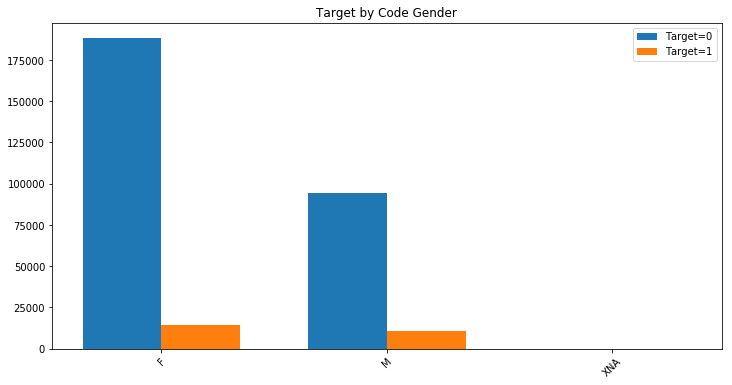

In [10]:
target_bar("CODE_GENDER", "Target by Code Gender")

- 比較的低所得者でも可能なローンなので女性が多い？

<a id='own-car-own-realty'></a>
## Own car/Own realty

In [11]:
tmp = app_trn.FLAG_OWN_CAR.value_counts().to_frame('OWN_CAR_value_counts')
tmp['OWN_CAR_ratio'] = tmp.OWN_CAR_value_counts / tmp.OWN_CAR_value_counts.sum()
tmp

,OWN_CAR_value_counts,OWN_CAR_ratio
N,202924,0.659892
Y,104587,0.340108


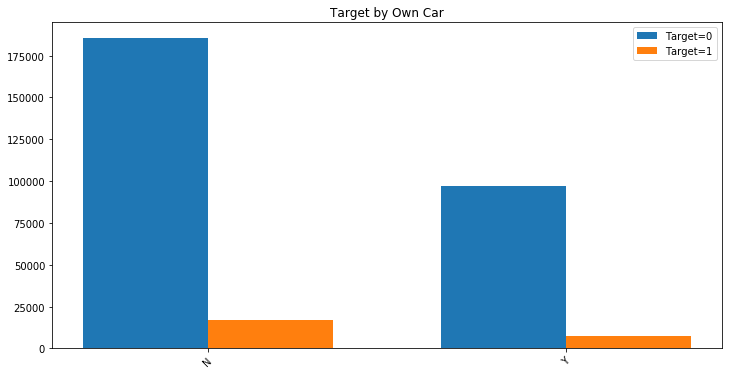

In [12]:
target_bar("FLAG_OWN_CAR", "Target by Own Car")

In [13]:
tmp = app_trn.FLAG_OWN_REALTY.value_counts().to_frame('OWN_REALTY_value_counts')
tmp['OWN_REALTY_ratio'] = tmp.OWN_REALTY_value_counts / tmp.OWN_REALTY_value_counts.sum()
tmp

,OWN_REALTY_value_counts,OWN_REALTY_ratio
Y,213312,0.693673
N,94199,0.306327


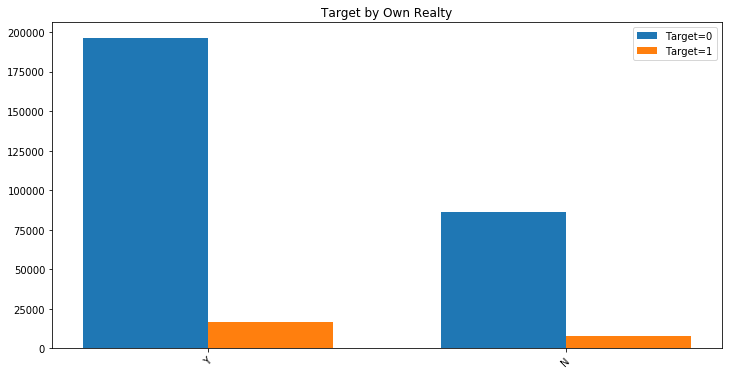

In [14]:
target_bar("FLAG_OWN_REALTY", "Target by Own Realty")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='amount-income-total'></a>
## Amount Income Total

In [15]:
app_trn.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

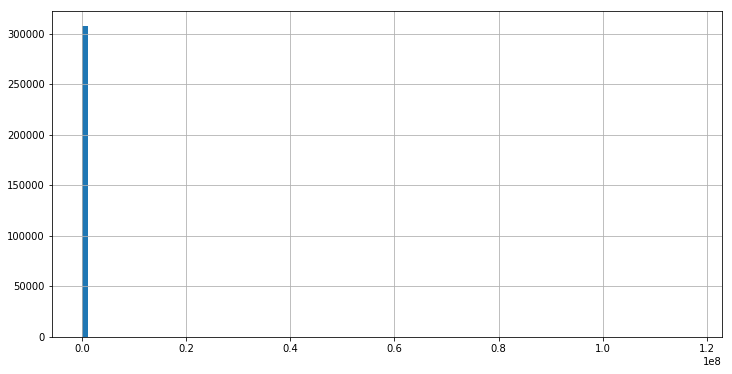

In [16]:
app_trn.AMT_INCOME_TOTAL.hist(bins=100, figsize=(12, 6))
plt.show()

とても大きな値が入っている、99.99パーセンタイル以下のデータでヒストグラム作成

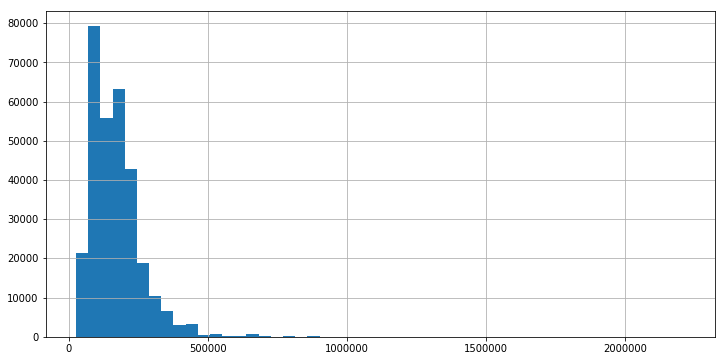

In [17]:
app_trn[(
    app_trn.AMT_INCOME_TOTAL < app_trn.AMT_INCOME_TOTAL.quantile(0.9999)
)].AMT_INCOME_TOTAL.hist(bins=50, figsize=(12, 6))
plt.show()

一応99パーセンタイル以下のデータでヒストグラム作成

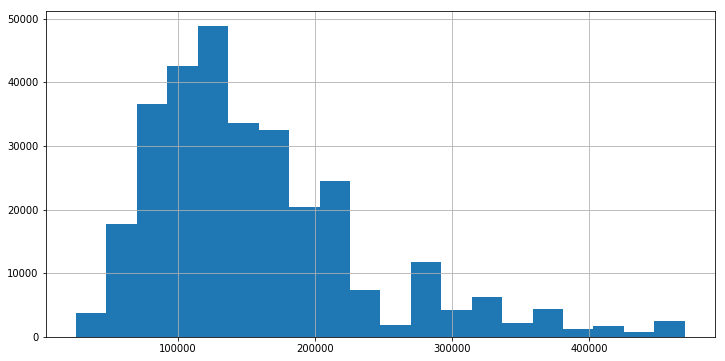

In [18]:
app_trn[(
    app_trn.AMT_INCOME_TOTAL < app_trn.AMT_INCOME_TOTAL.quantile(0.99)
)].AMT_INCOME_TOTAL.hist(bins=20, figsize=(12, 6))
plt.show()

99.99パーセンタイルくらいのデータで見ると良いのかな？

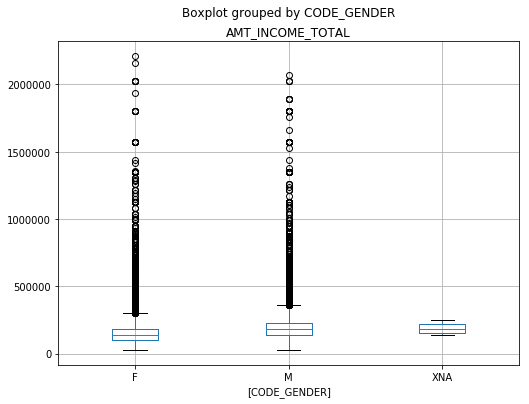

In [19]:
app_trn[(
    app_trn.AMT_INCOME_TOTAL < app_trn.AMT_INCOME_TOTAL.quantile(0.9999)
)][['CODE_GENDER', 'AMT_INCOME_TOTAL']].boxplot(by='CODE_GENDER', figsize=(8, 6))
plt.show()

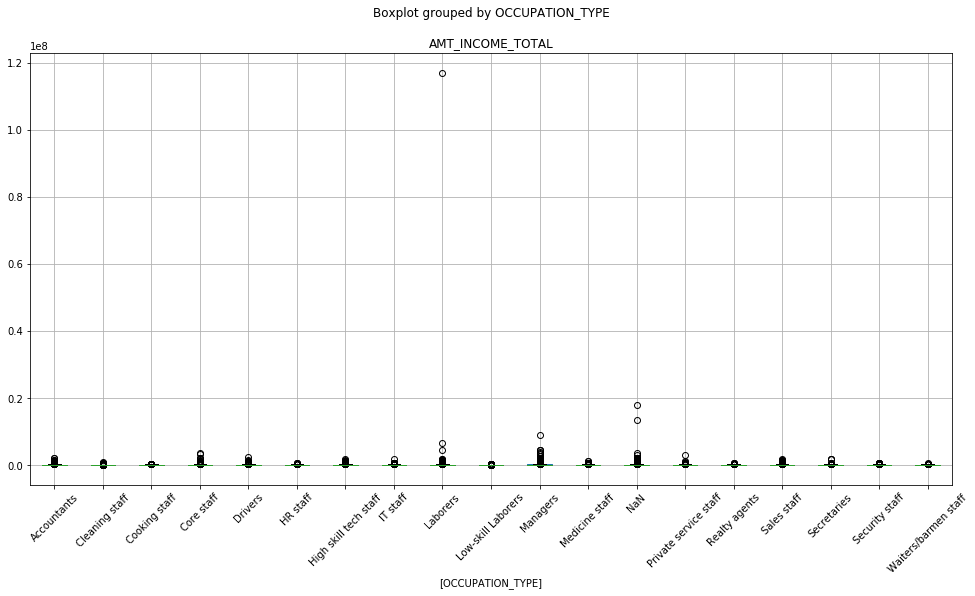

In [20]:
tmp = app_trn[['AMT_INCOME_TOTAL', 'OCCUPATION_TYPE']].copy()
tmp['OCCUPATION_TYPE']  = tmp.OCCUPATION_TYPE.fillna('NaN')
tmp.boxplot(by='OCCUPATION_TYPE', figsize=(16, 8), rot=45)
plt.show()

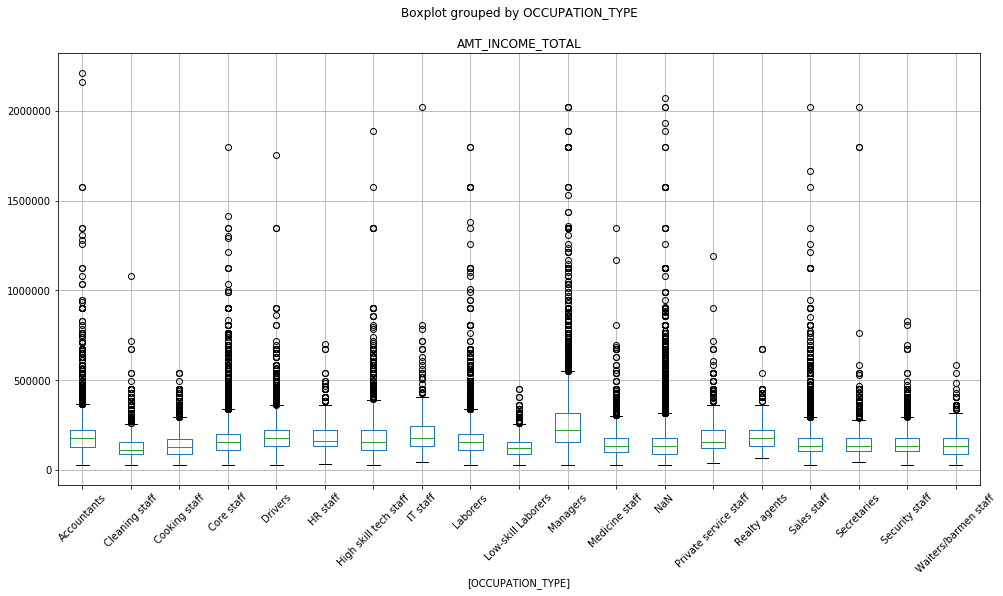

In [21]:
tmp = app_trn[['AMT_INCOME_TOTAL', 'OCCUPATION_TYPE']].copy()
tmp['OCCUPATION_TYPE']  = tmp.OCCUPATION_TYPE.fillna('NaN')
tmp[(
    tmp.AMT_INCOME_TOTAL < tmp.AMT_INCOME_TOTAL.quantile(0.9999)
)].boxplot(by='OCCUPATION_TYPE', figsize=(16, 8), rot=45)
plt.show()

- Laborersに異常な値がある気がする
- Managersがやはり平均高め
- High skill tech staffは意外と収入が高くない

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='amount-credit'></a>
## Amout Credit

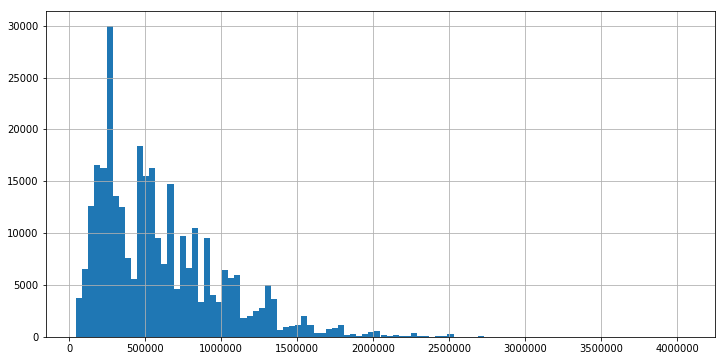

In [22]:
app_trn.AMT_CREDIT.hist(bins=100, figsize=(12, 6))
plt.show()

- Amount Income Totalに比較すると異常に大きな値はない
- キリのいい値に分布が集まっている？

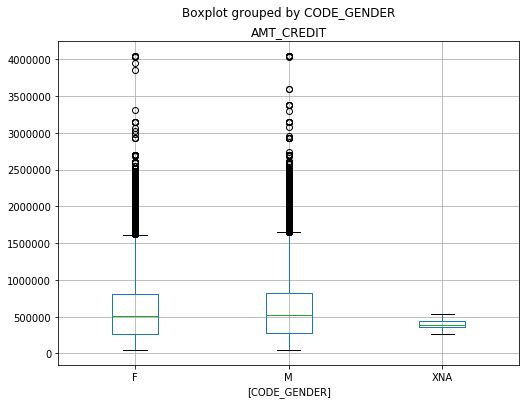

In [23]:
app_trn[['CODE_GENDER', 'AMT_CREDIT']].boxplot(by='CODE_GENDER', figsize=(8, 6))
plt.show()

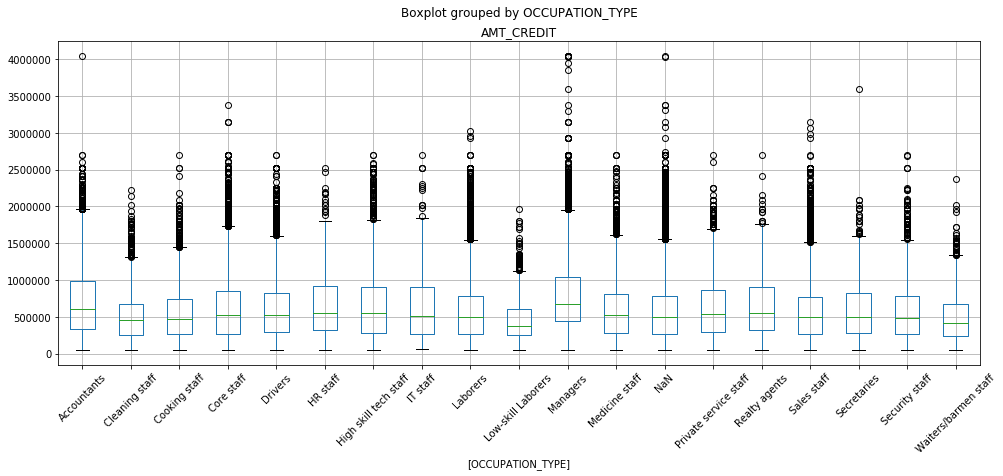

In [24]:
tmp = app_trn[['AMT_CREDIT', 'OCCUPATION_TYPE']].copy()
tmp['OCCUPATION_TYPE']  = tmp.OCCUPATION_TYPE.fillna('NaN')
tmp.boxplot(by='OCCUPATION_TYPE', figsize=(16, 6), rot=45)
plt.show()

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='amount-annuity'></a>
## Amout Annuity
Annuity = 年金

In [25]:
app_trn.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

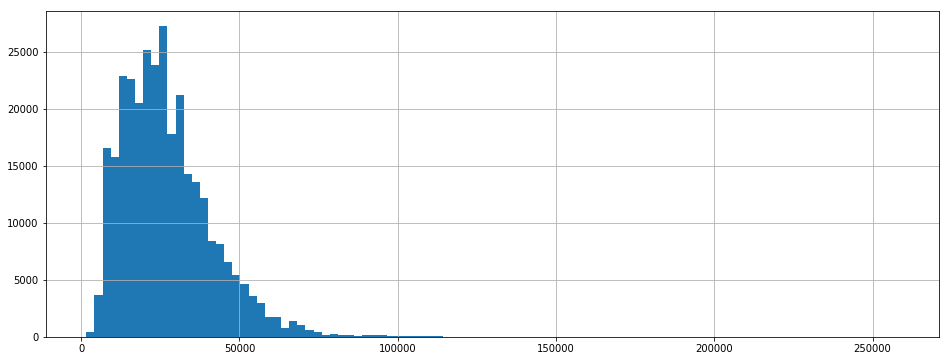

In [26]:
app_trn.AMT_ANNUITY.hist(bins=100, figsize=(16, 6))

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='amount-goods-price'></a>
## Amout Goods Price

In [27]:
app_trn.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

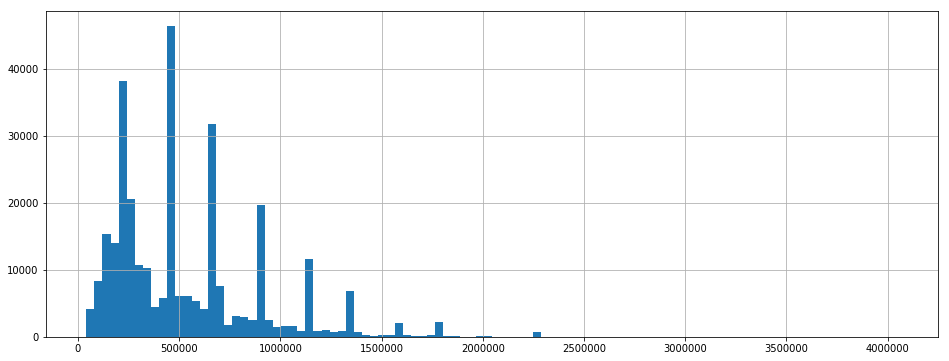

In [28]:
app_trn.AMT_GOODS_PRICE.hist(bins=100, figsize=(16, 6))

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='name-type-suite'></a>
## Name Type Suite
Who was accompanying client when he was applying for the loan

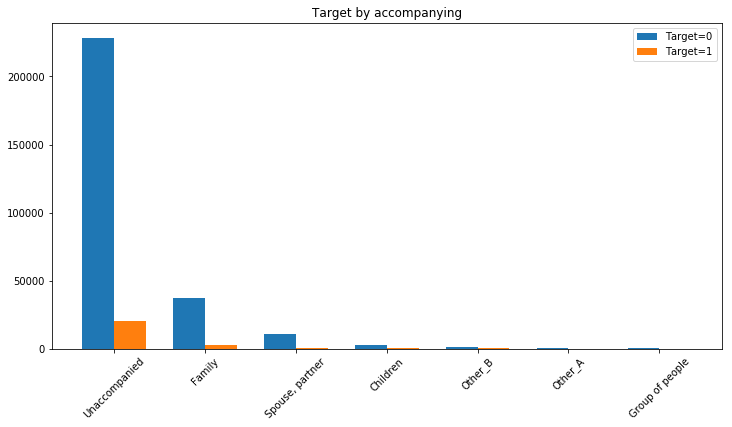

In [29]:
target_bar('NAME_TYPE_SUITE', 'Target by accompanying')

- Unacompaniedが1の時が多い

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='name-income-type'></a>
## Name Income Type

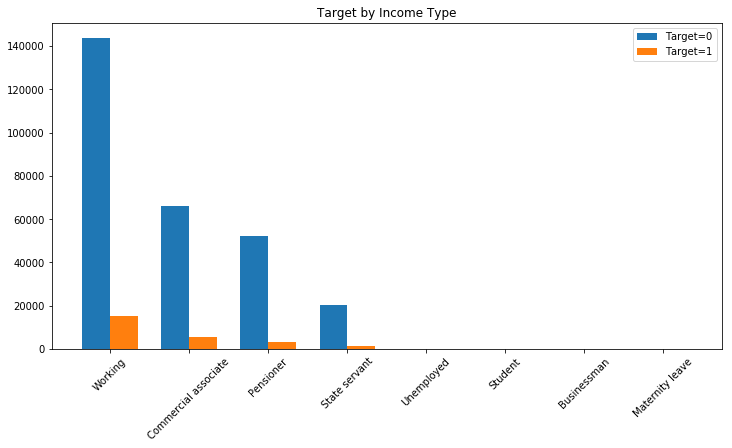

In [30]:
target_bar('NAME_INCOME_TYPE', 'Target by Income Type')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='name-education-type'></a>
## Name Education Type

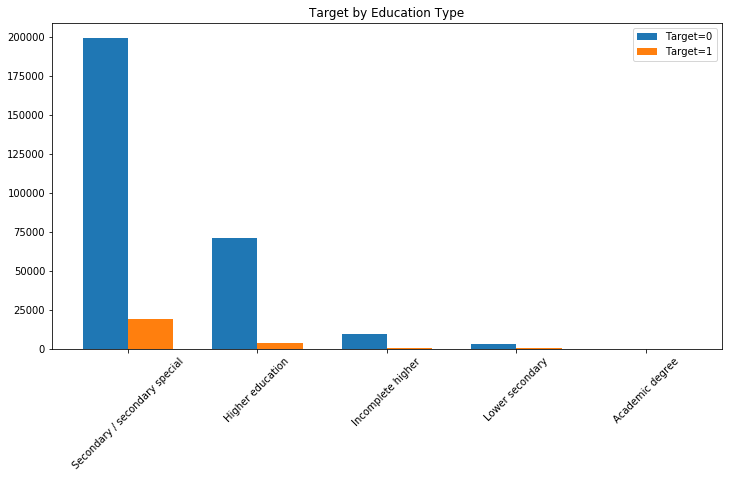

In [31]:
target_bar('NAME_EDUCATION_TYPE', 'Target by Education Type')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='name-family-status'></a>
## Name Family Status

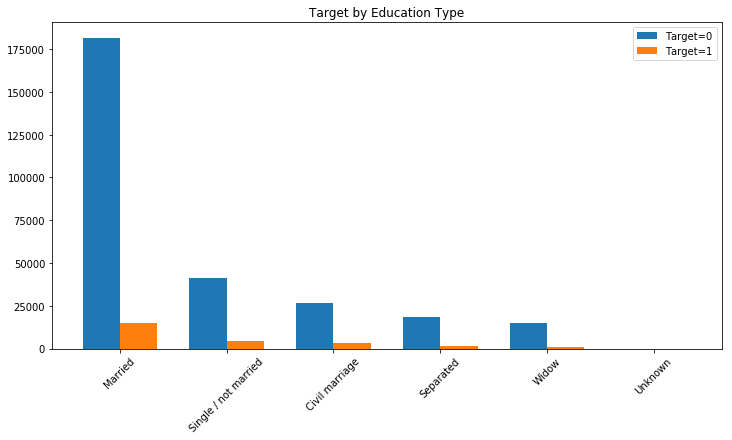

In [32]:
target_bar('NAME_FAMILY_STATUS', 'Target by Education Type')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='name-housing-type'></a>
## Name Housing Type

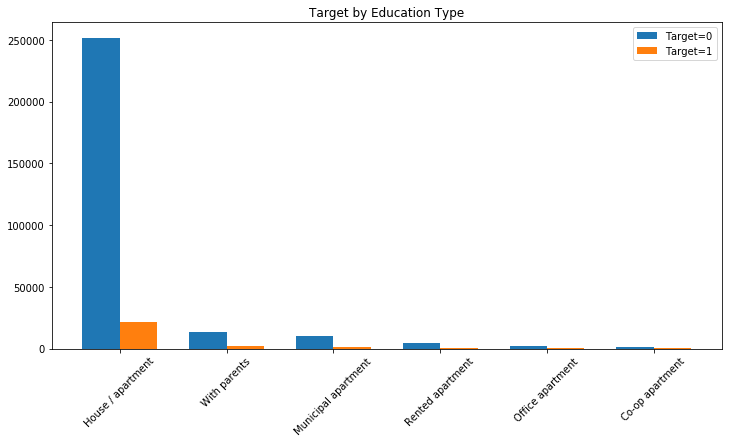

In [33]:
target_bar('NAME_HOUSING_TYPE', 'Target by Education Type')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='region-population-relative'></a>
## Region Population Relative

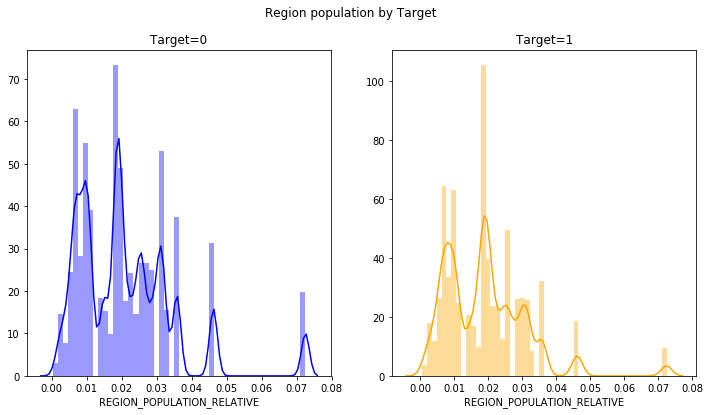

In [34]:
target_hist('REGION_POPULATION_RELATIVE', 'Region population by Target')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='days-birth'></a>
## Days Birth

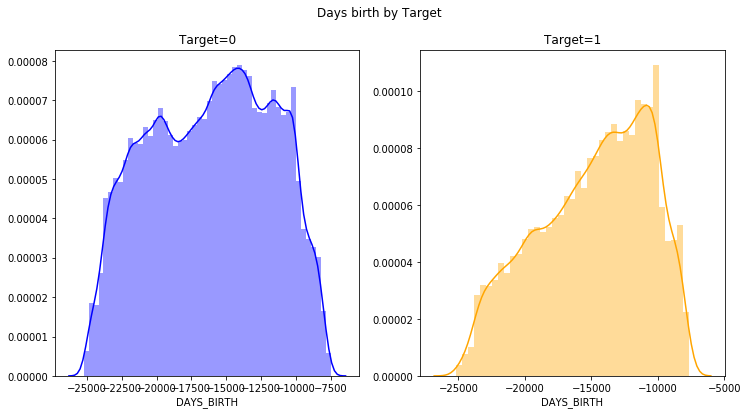

In [35]:
target_hist('DAYS_BIRTH', 'Days birth by Target')

- Target=1は若い方に偏っている

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='days-employed'></a>
## Days Employed

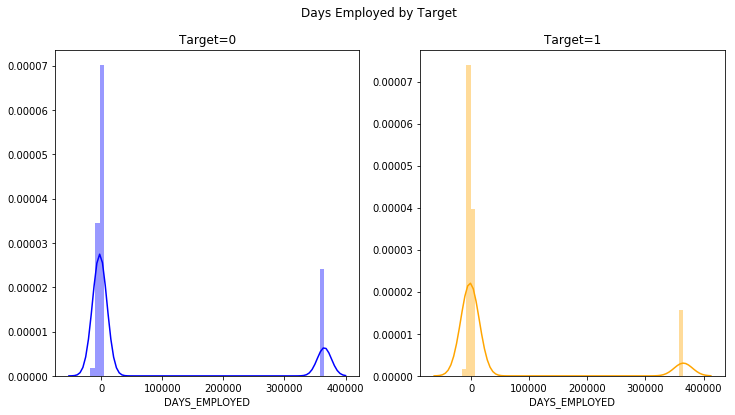

In [36]:
target_hist('DAYS_EMPLOYED', 'Days Employed by Target')

マイナスの値とプラスの値で分けてヒストグラムを書いてみる
https://www.kaggle.com/c/home-credit-default-risk/discussion/57247

365243.0はNaNにrepalaceしたほうがいいかも

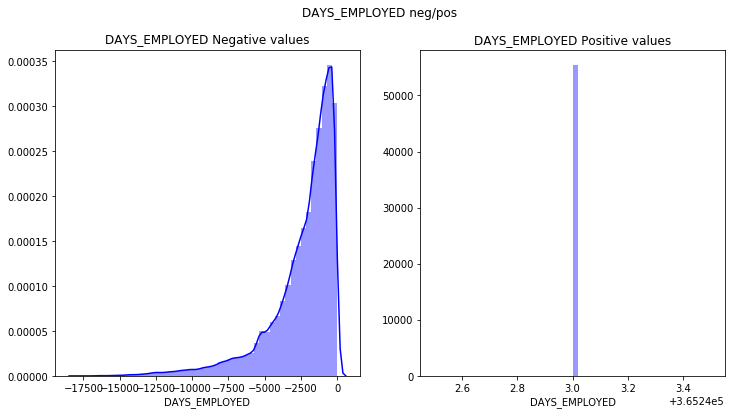

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64
count     55374.0
mean     365243.0
std           0.0
min      365243.0
25%      365243.0
50%      365243.0
75%      365243.0
max      365243.0
Name: DAYS_EMPLOYED, dtype: float64


In [167]:
df0 = app_trn[app_trn.DAYS_EMPLOYED <= 0]
df1 = app_trn[app_trn.DAYS_EMPLOYED > 0]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.distplot(df0.DAYS_EMPLOYED.dropna(), ax=axes[0], color='b')
axes[0].set_title('DAYS_EMPLOYED Negative values')
sns.distplot(df1.DAYS_EMPLOYED.dropna(), ax=axes[1], color='b', kde=False)
axes[1].set_title('DAYS_EMPLOYED Positive values')
fig.suptitle("DAYS_EMPLOYED neg/pos")
plt.show()
print(df0.DAYS_EMPLOYED.describe())
print(df1.DAYS_EMPLOYED.describe())

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='days-registration'></a>
## Days Rgistration

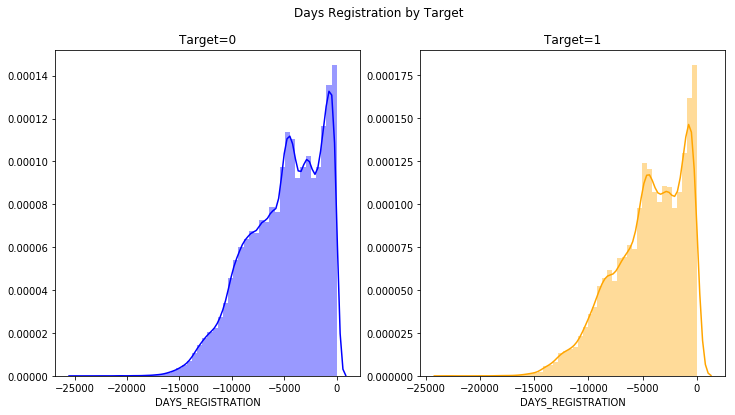

In [37]:
target_hist('DAYS_REGISTRATION', 'Days Registration by Target')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='days-id-publish'></a>
## Days ID Publish

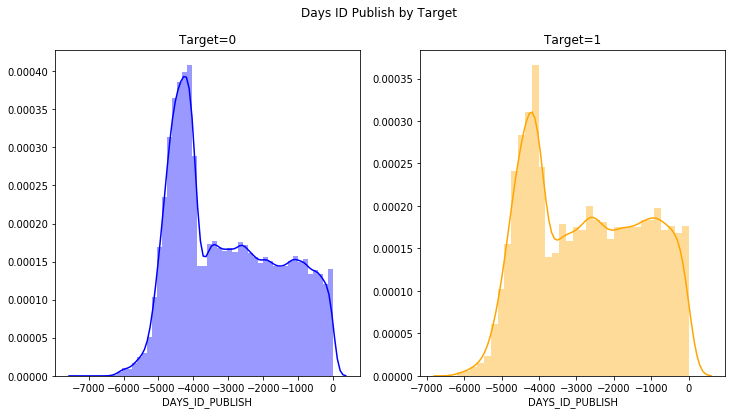

In [38]:
target_hist('DAYS_ID_PUBLISH', 'Days ID Publish by Target')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='own-car-age'></a>
## Own Car Age

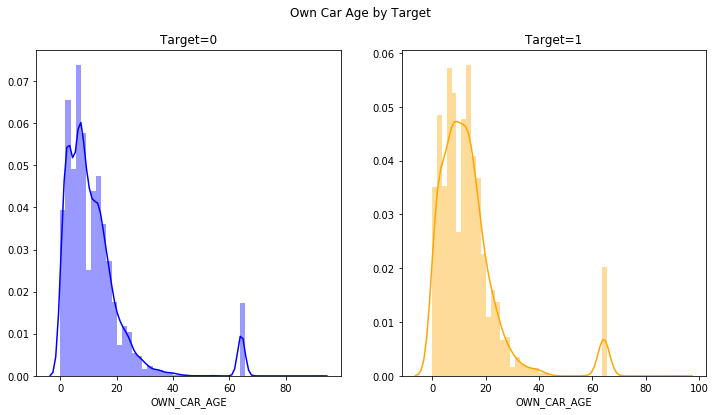

In [39]:
target_hist('OWN_CAR_AGE', 'Own Car Age by Target')

- Target=1のほうが年数多い方に若干偏り

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='flag-mobil'></a>
## Flag Mobil

1
1


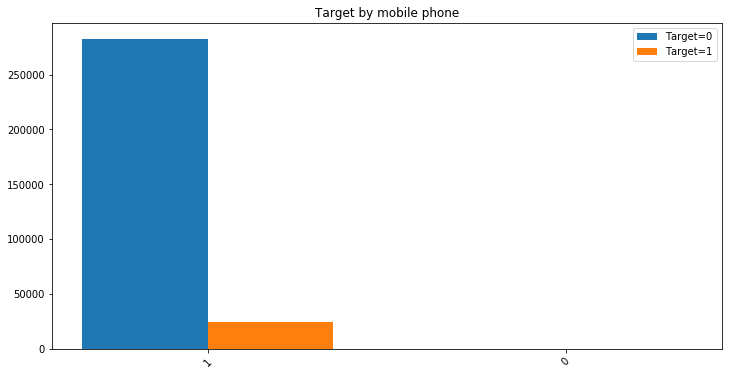

In [40]:
print((app_trn.FLAG_MOBIL == 0).sum())
print((app_tst.FLAG_MOBIL == 0).sum())
target_bar('FLAG_MOBIL', 'Target by mobile phone')

- FLAG_MOBIL == 0の人が1人しかいないから特徴量として機能しないのでは？

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='flag-emp-phone'></a>
## Flag Employment Phone
description : Did client provide work phone (1=YES, 0=NO)

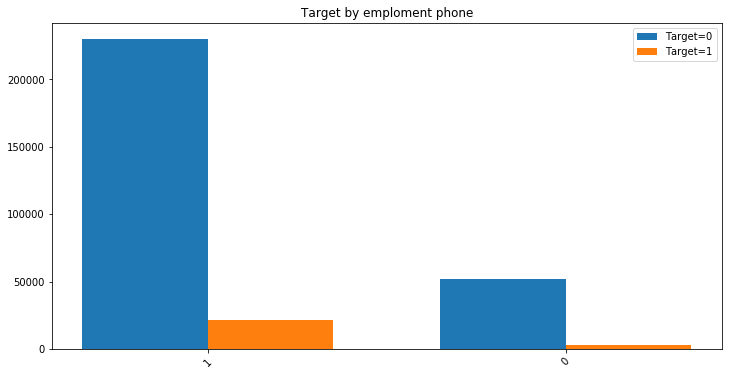

In [41]:
target_bar('FLAG_EMP_PHONE', 'Target by emploment phone')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='flag-work-phone'></a>
## Flag Work Phone
description : Did client provide home phone (1=YES, 0=NO)

description間違っていませんか?

このDiscussionで指摘されている
https://www.kaggle.com/c/home-credit-default-risk/discussion/57113

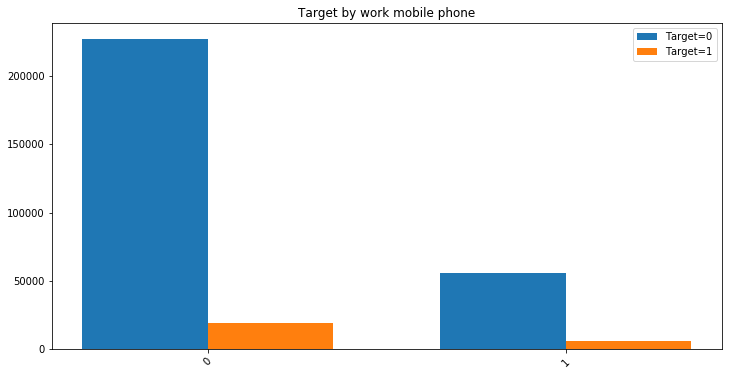

In [42]:
target_bar('FLAG_WORK_PHONE', 'Target by work mobile phone')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='flag-cont-mobile'></a>
## Flag Cont Mobile
description : Was mobile phone reachable (1=YES, 0=NO)

574
78


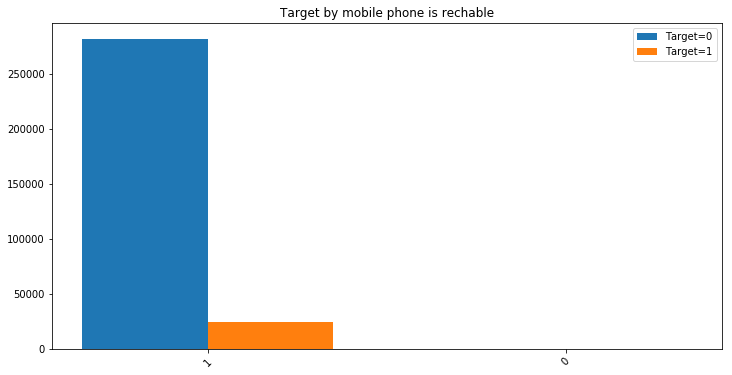

In [43]:
print((app_trn.FLAG_CONT_MOBILE == 0).sum())
print((app_tst.FLAG_CONT_MOBILE == 0).sum())
target_bar('FLAG_CONT_MOBILE', 'Target by mobile phone is rechable')

- 少し0があるから特徴量として機能するはず

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='flag-phone'></a>
## Flag Phone
description : Did client provide home phone (1=YES, 0=NO)

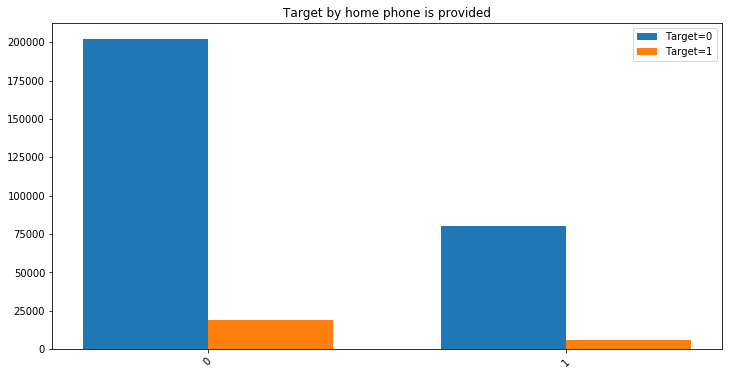

In [44]:
target_bar('FLAG_PHONE', 'Target by home phone is provided')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='flag-email'></a>
## Flag Email
description : Did client provide email (1=YES, 0=NO)

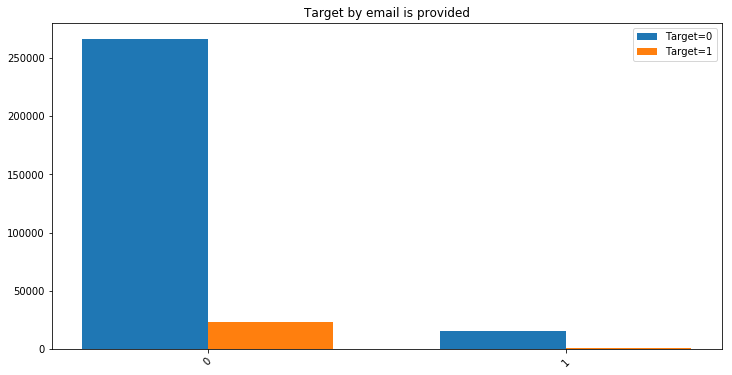

In [45]:
target_bar('FLAG_EMAIL', 'Target by email is provided')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='occupation-type'></a>
## Occupation Type

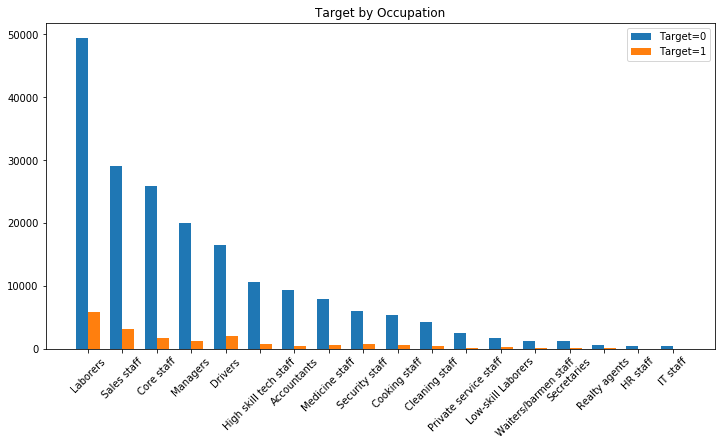

In [46]:
target_bar("OCCUPATION_TYPE", "Target by Occupation")

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='cnt-fam-members'></a>
## Count Family Members
description : How many family members does client have

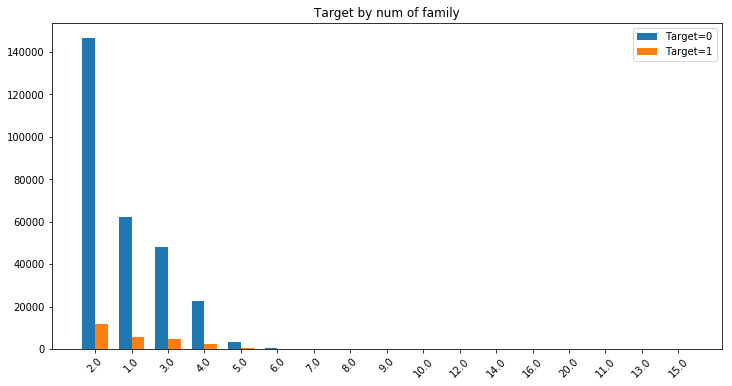

In [47]:
target_bar('CNT_FAM_MEMBERS', 'Target by num of family')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='region-rating-client'></a>
## Region Rating Client
description : Our rating of the region where client lives (1,2,3)

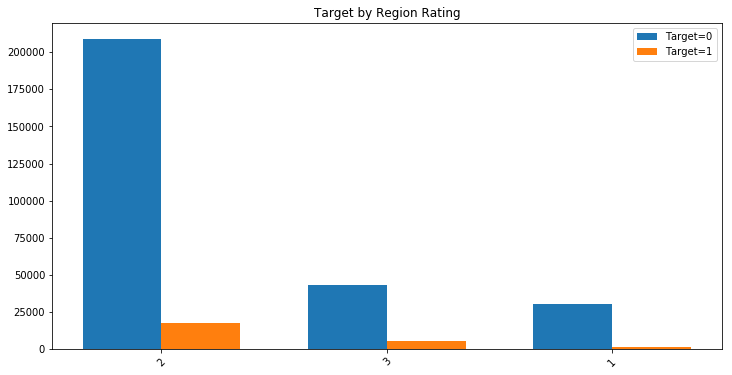

In [48]:
target_bar('REGION_RATING_CLIENT', 'Target by Region Rating')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='region-rating-client-w-city'></a>
## Region Rating Client W City
description : Our rating of the region where client lives with taking city into account (1,2,3)

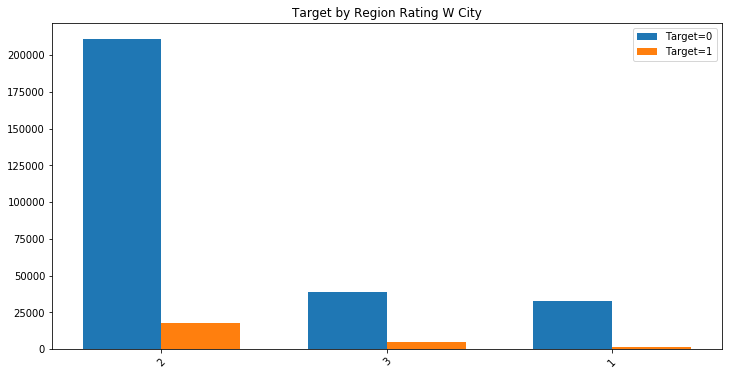

In [49]:
target_bar('REGION_RATING_CLIENT_W_CITY', 'Target by Region Rating W City')

- Region Rating Clientとの違いがわからない

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='weekday-appr-process-start'></a>
## Weekday Application Process Start

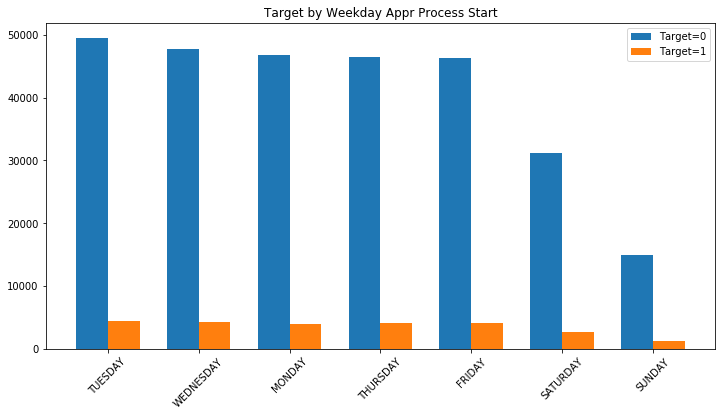

In [50]:
target_bar('WEEKDAY_APPR_PROCESS_START', 'Target by Weekday Appr Process Start')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='hour-appr-process-start'></a>
## Hour Application Process Start

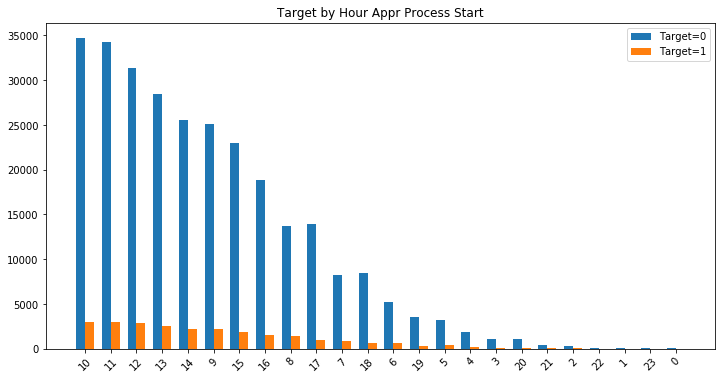

In [51]:
target_bar('HOUR_APPR_PROCESS_START', 'Target by Hour Appr Process Start')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='reg-region-not-live-region'></a>
## Registry Region Does Not Match Live Region
description : Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)

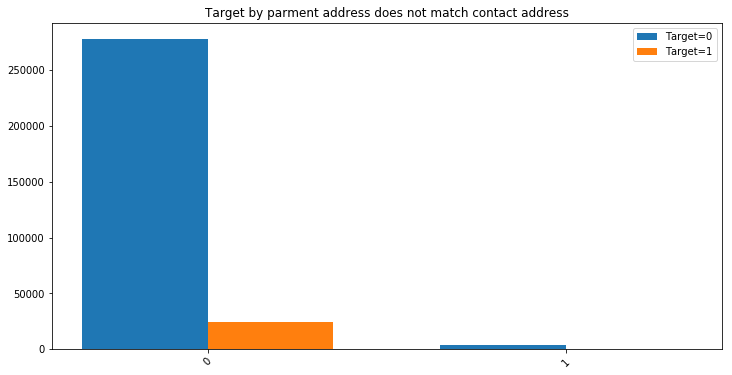

In [52]:
target_bar('REG_REGION_NOT_LIVE_REGION', 'Target by parment address does not match contact address')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='reg-region-not-work-region'></a>
## Registry Region Does Not Match Work Region
description : Flag if client's contact address does not match work address (1=different, 0=same, at region level)

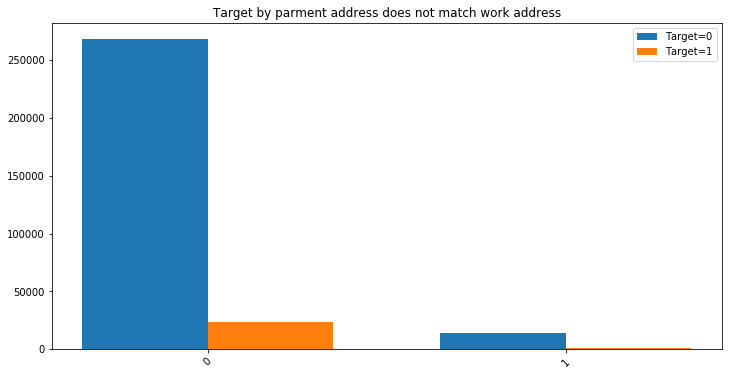

In [53]:
target_bar('REG_REGION_NOT_WORK_REGION', 'Target by parment address does not match work address')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='reg-city-not-live-city'></a>
## Registry City Does Not Match Live City
description : Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)

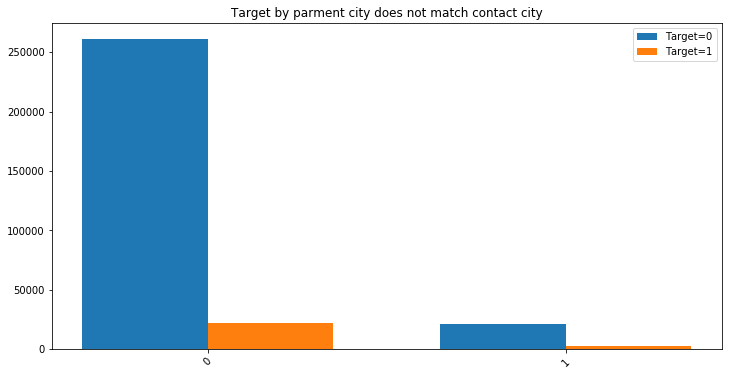

In [54]:
target_bar('REG_CITY_NOT_LIVE_CITY', 'Target by parment city does not match contact city')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='reg-city-not-work-city'></a>
## Registry City Does Not Match Work City
description : Flag if client's contact address does not match work address (1=different, 0=same, at city level)

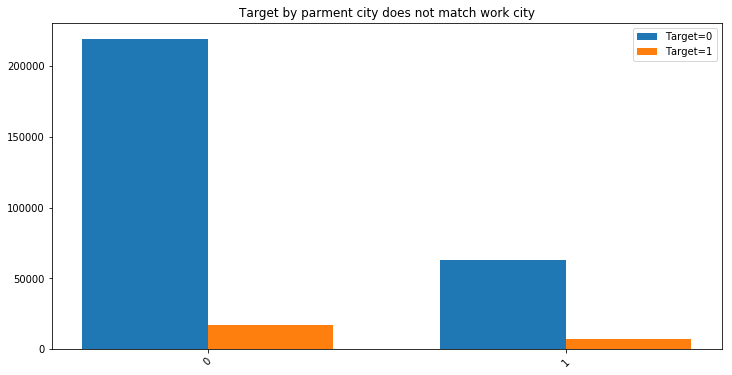

In [55]:
target_bar('REG_CITY_NOT_WORK_CITY', 'Target by parment city does not match work city')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='organization-type'></a>
## Organization Type
description : Type of organization where client works

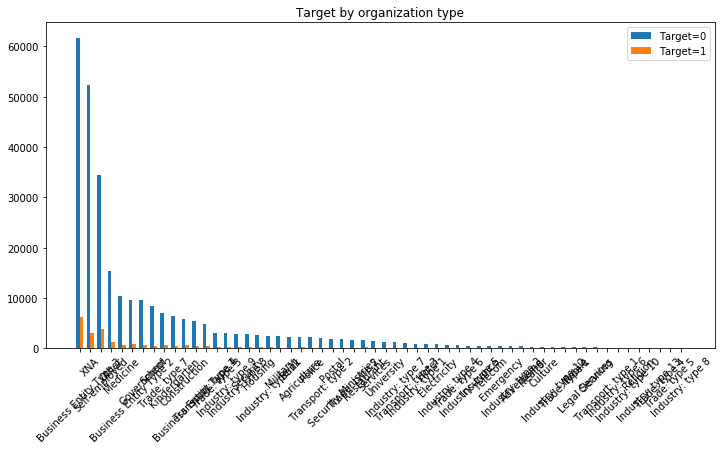

In [56]:
target_bar('ORGANIZATION_TYPE', 'Target by organization type')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='ext-source-1'></a>
## Extarnel Data Source 1
description : Normalized score from external data source

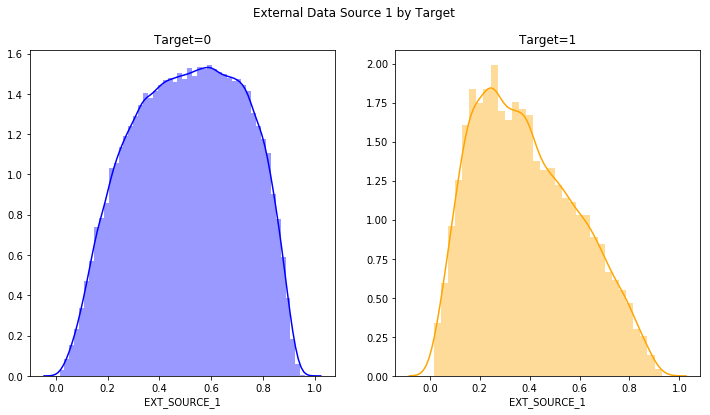

In [57]:
target_hist('EXT_SOURCE_1', 'External Data Source 1 by Target')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='ext-source-2'></a>
## Extarnel Data Source 2
description : Normalized score from external data source

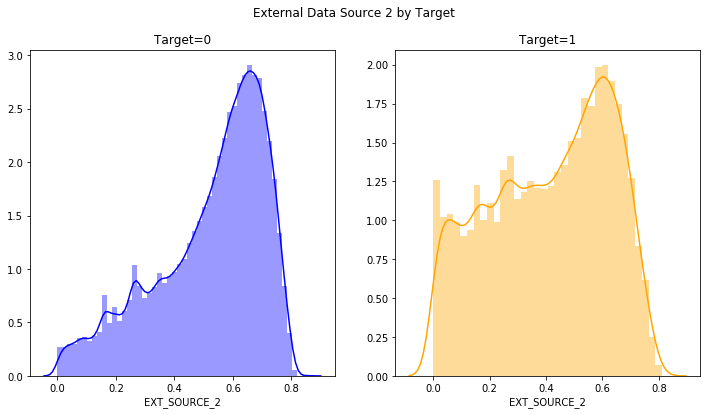

In [58]:
target_hist('EXT_SOURCE_2', 'External Data Source 2 by Target')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='ext-source-3'></a>
## Extarnel Data Source 3
description : Normalized score from external data source

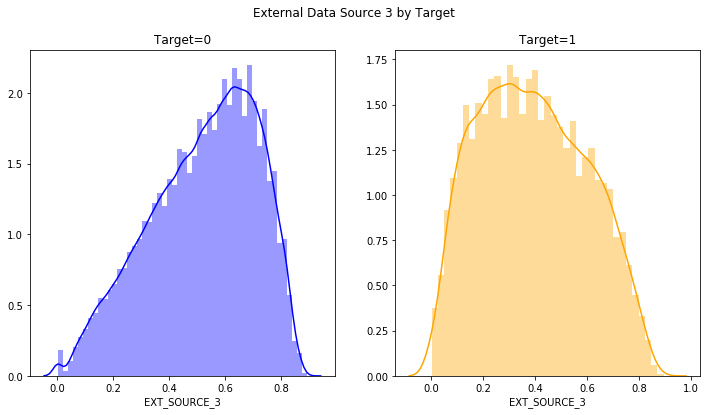

In [59]:
target_hist('EXT_SOURCE_3', 'External Data Source 3 by Target')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='ext-source-pairplot'></a>
## Extarnel Data Source Pairplot

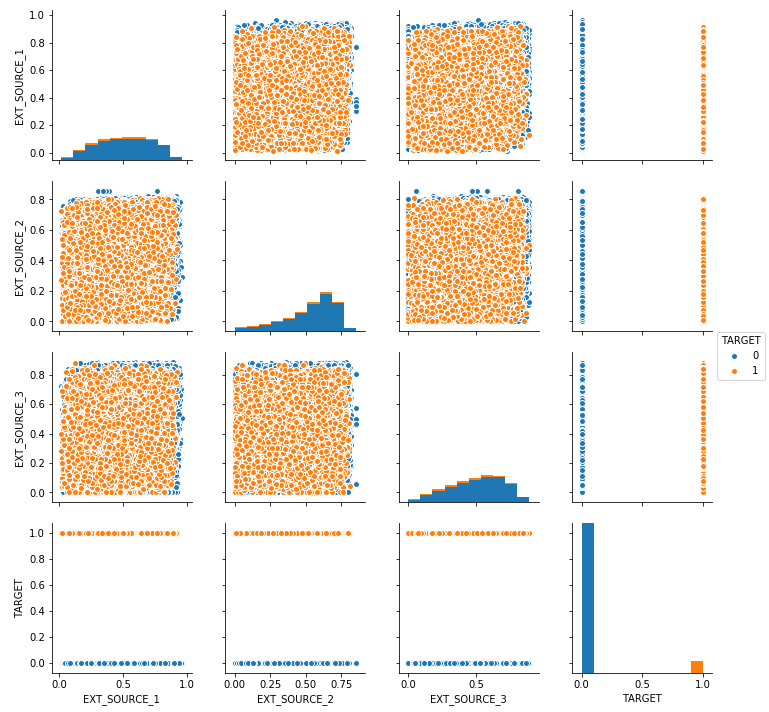

In [60]:
sns.pairplot(app_trn[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']].dropna(), hue='TARGET')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='apartments'></a>
## Apartments
description : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

#### AVG

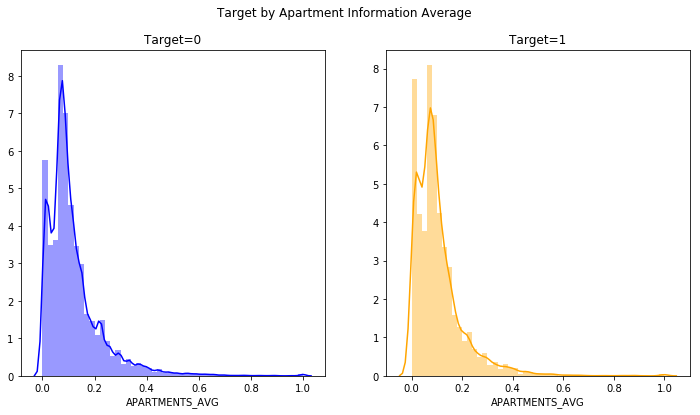

In [61]:
target_hist('APARTMENTS_AVG', 'Target by Apartment Information Average')

#### Mode

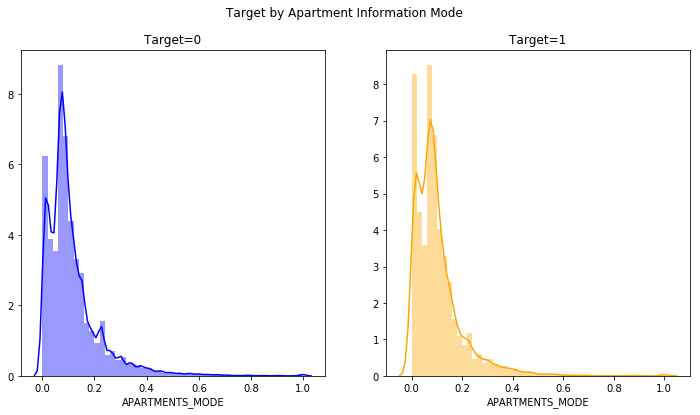

In [62]:
target_hist('APARTMENTS_MODE', 'Target by Apartment Information Mode')

#### Median

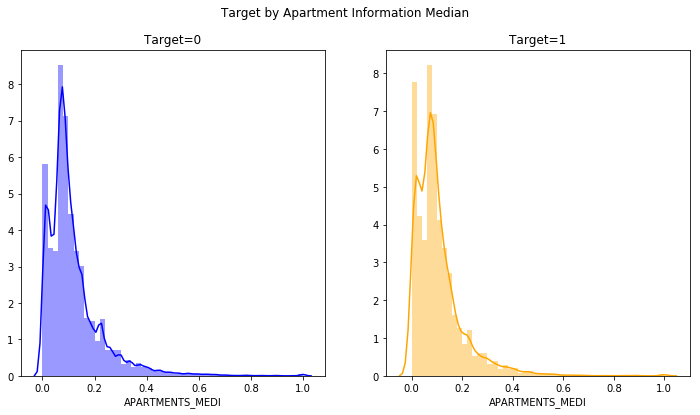

In [63]:
target_hist('APARTMENTS_MEDI', 'Target by Apartment Information Median')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='basementarea'></a>
## Basement Area
description : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

#### AVG

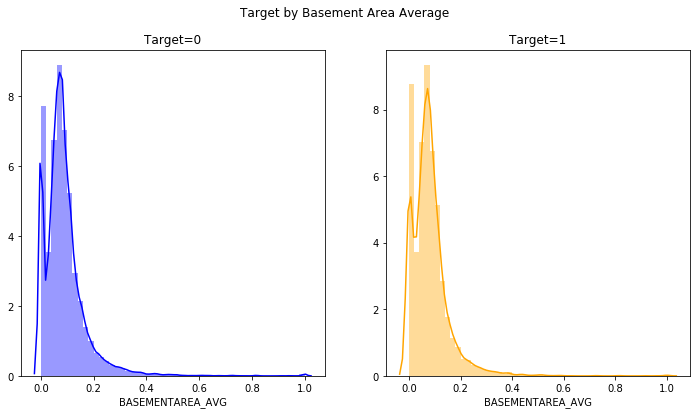

In [64]:
target_hist('BASEMENTAREA_AVG', 'Target by Basement Area Average')

#### Mode

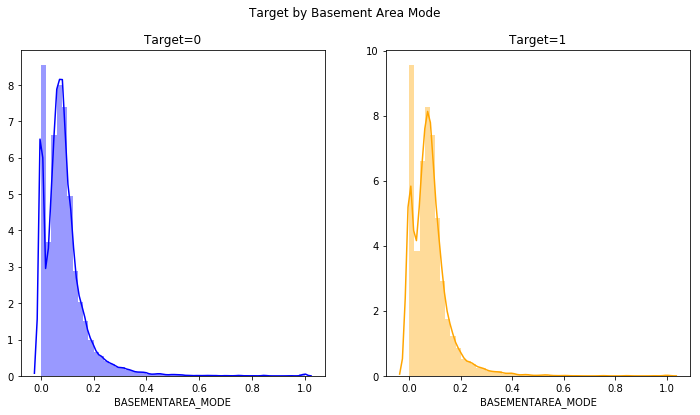

In [65]:
target_hist('BASEMENTAREA_MODE', 'Target by Basement Area Mode')

#### Median

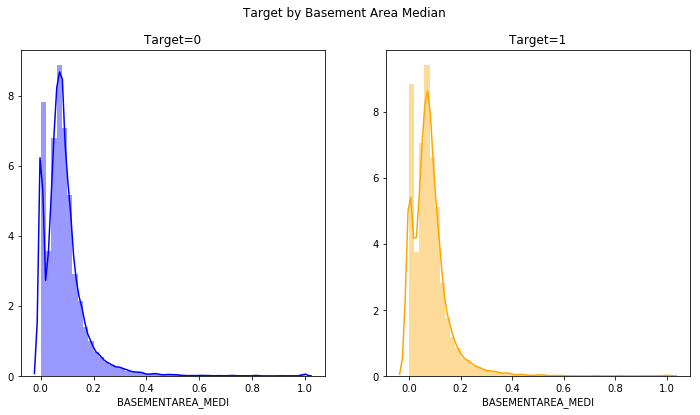

In [66]:
target_hist('BASEMENTAREA_MEDI', 'Target by Basement Area Median')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='years-beginexpluatation'></a>
## Years Beginexpluatation
description : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

#### AVG

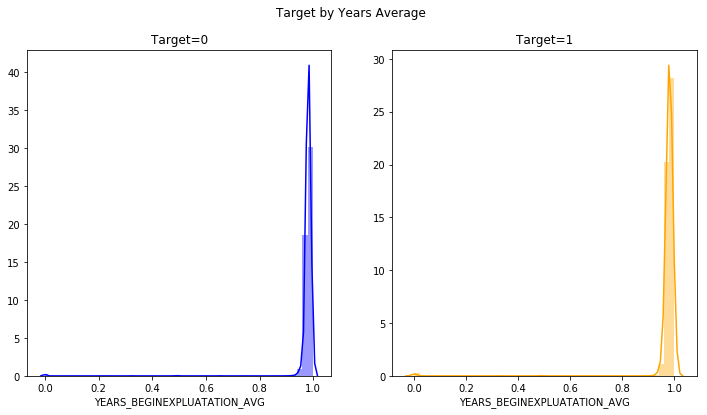

In [67]:
target_hist('YEARS_BEGINEXPLUATATION_AVG', 'Target by Years Average')

#### Mode

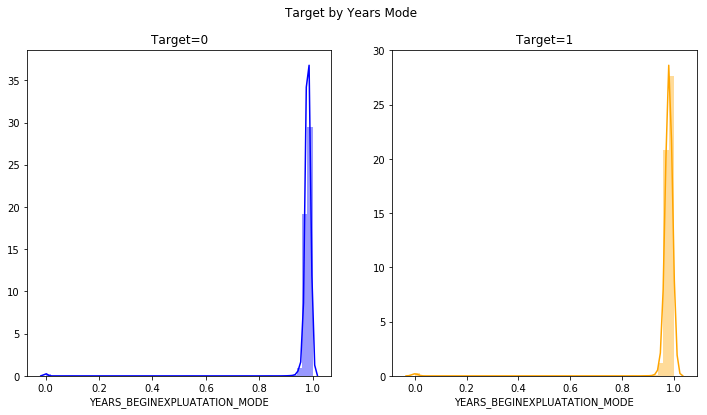

In [68]:
target_hist('YEARS_BEGINEXPLUATATION_MODE', 'Target by Years Mode')

#### Median

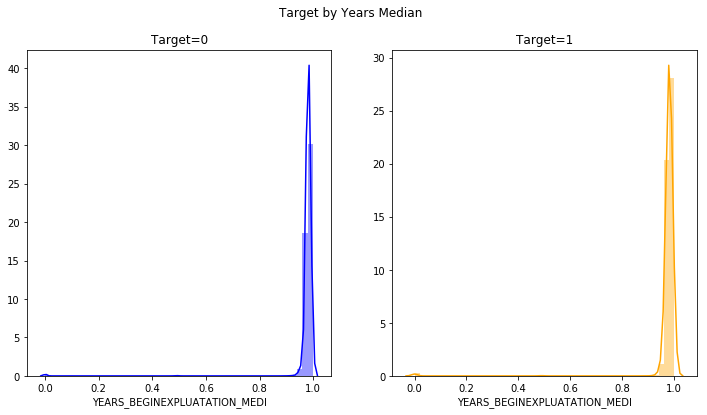

In [69]:
target_hist('YEARS_BEGINEXPLUATATION_MEDI', 'Target by Years Median')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='years-build'></a>
## Years Build
description : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

#### AVG

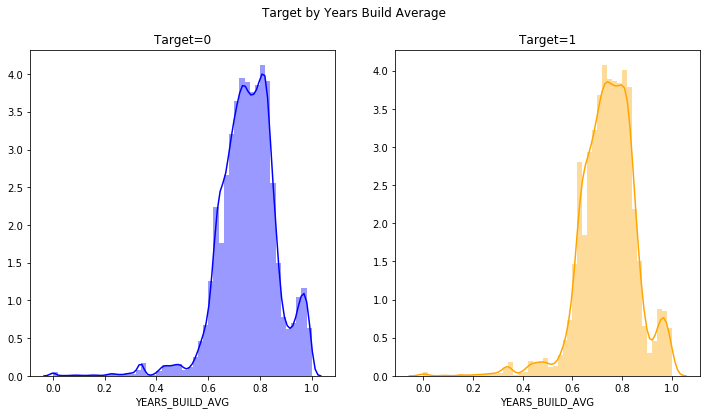

In [70]:
target_hist('YEARS_BUILD_AVG', 'Target by Years Build Average')

#### Mode

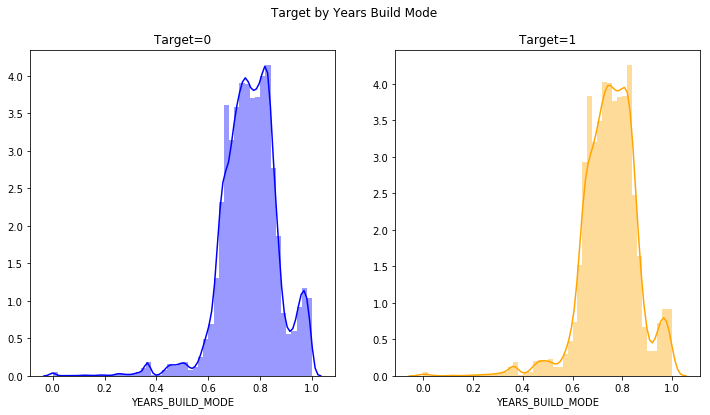

In [71]:
target_hist('YEARS_BUILD_MODE', 'Target by Years Build Mode')

#### Median

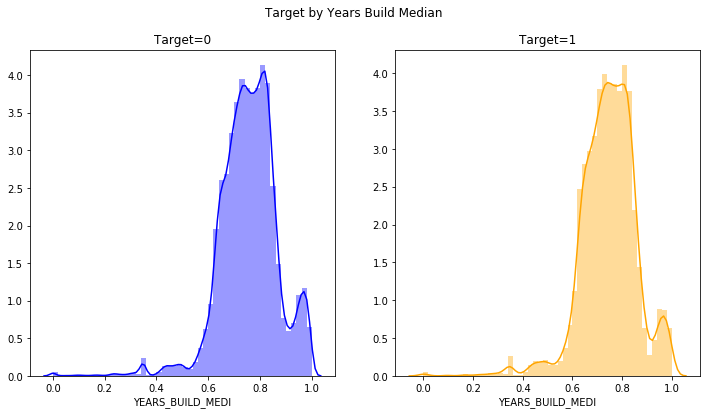

In [72]:
target_hist('YEARS_BUILD_MEDI', 'Target by Years Build Median')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='common-area'></a>
## Common Area
description : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

#### AVG

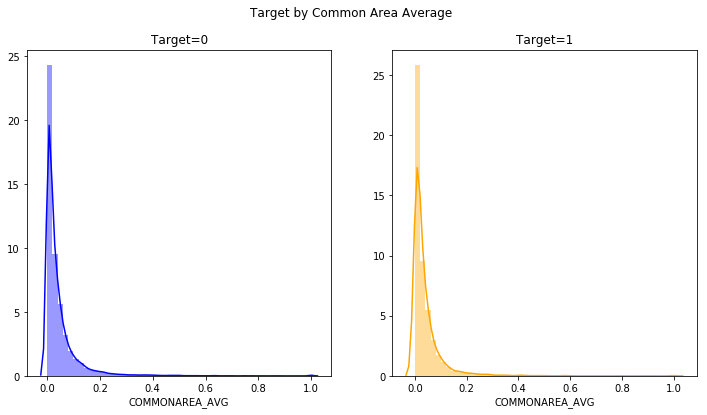

In [73]:
target_hist('COMMONAREA_AVG', 'Target by Common Area Average')

#### Mode

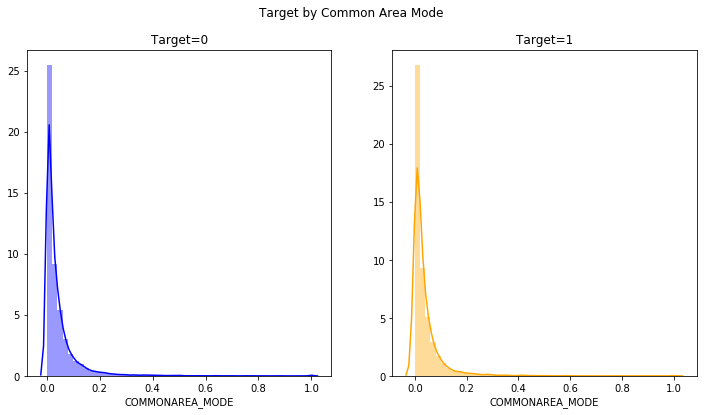

In [74]:
target_hist('COMMONAREA_MODE', 'Target by Common Area Mode')

#### Median

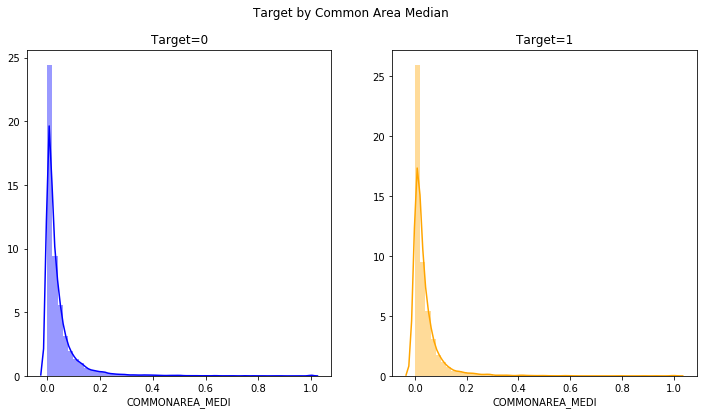

In [75]:
target_hist('COMMONAREA_MEDI', 'Target by Common Area Median')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='elevators'></a>
## Elevators
description : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

#### AVG

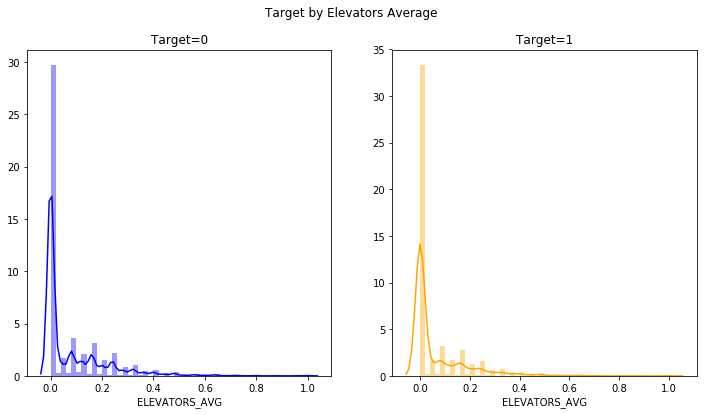

In [76]:
target_hist('ELEVATORS_AVG', 'Target by Elevators Average')

#### Mode

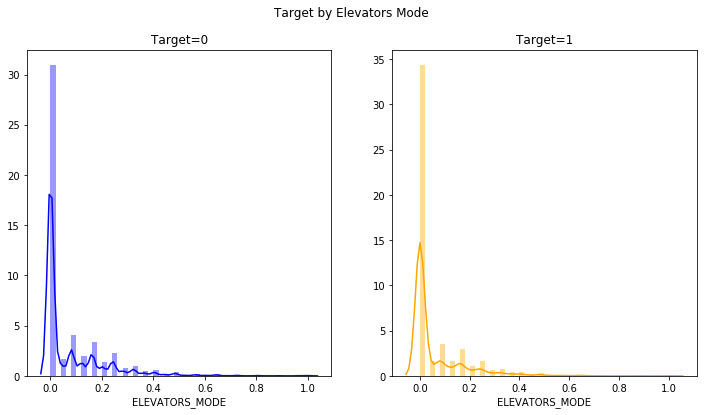

In [77]:
target_hist('ELEVATORS_MODE', 'Target by Elevators Mode')

#### Median

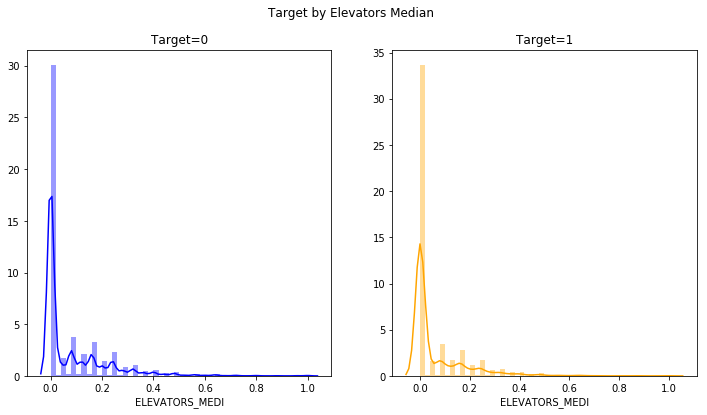

In [78]:
target_hist('ELEVATORS_MEDI', 'Target by Elevators Median')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='entrances'></a>
## Entrances
description : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

#### AVG

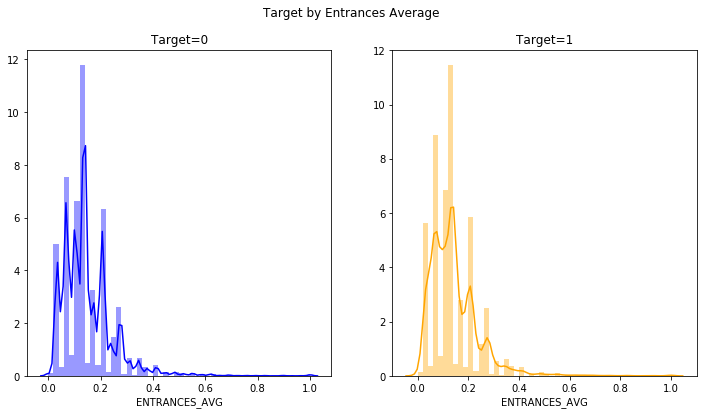

In [79]:
target_hist('ENTRANCES_AVG', 'Target by Entrances Average')

#### Mode

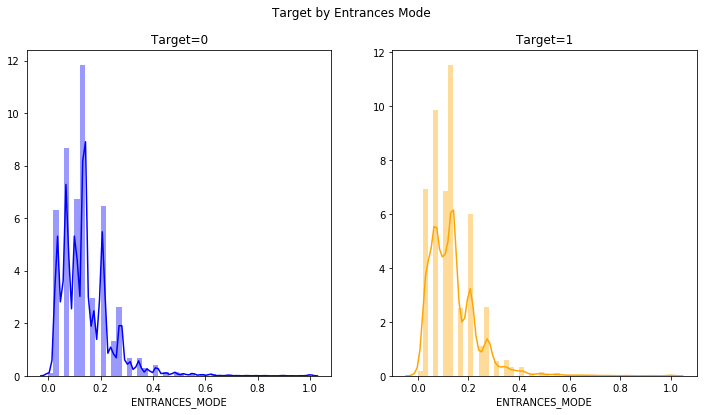

In [80]:
target_hist('ENTRANCES_MODE', 'Target by Entrances Mode')

#### Median

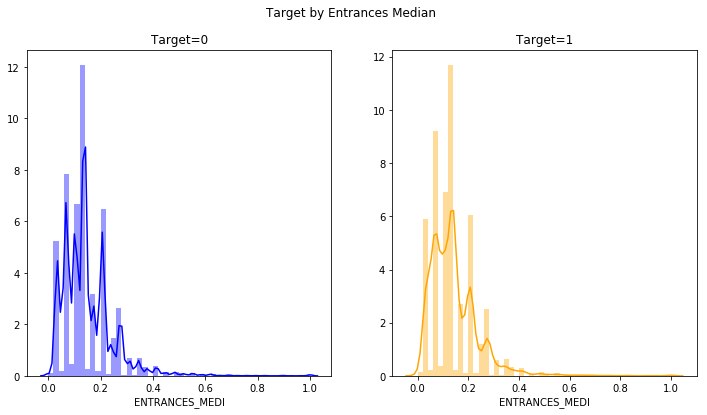

In [81]:
target_hist('ENTRANCES_MEDI', 'Target by Entrances Median')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='floors-max'></a>
## Floors Max
description : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

#### AVG

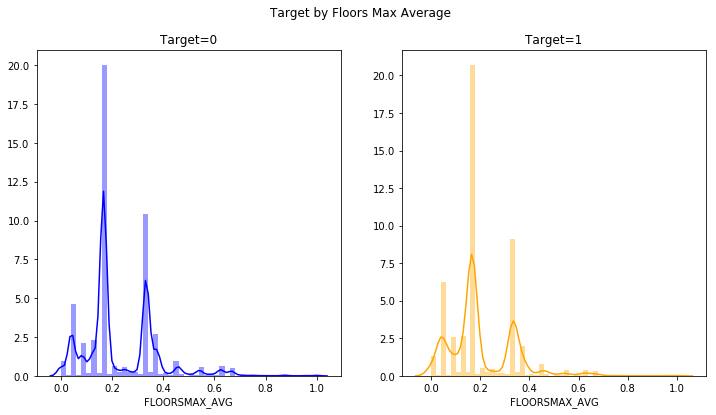

In [82]:
target_hist('FLOORSMAX_AVG', 'Target by Floors Max Average')

#### Mode

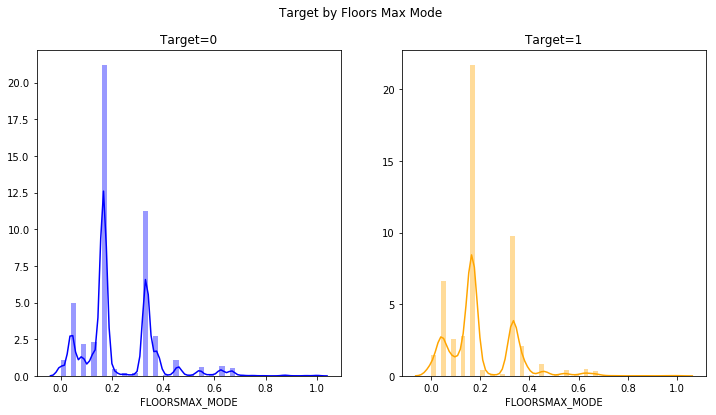

In [83]:
target_hist('FLOORSMAX_MODE', 'Target by Floors Max Mode')

#### Median

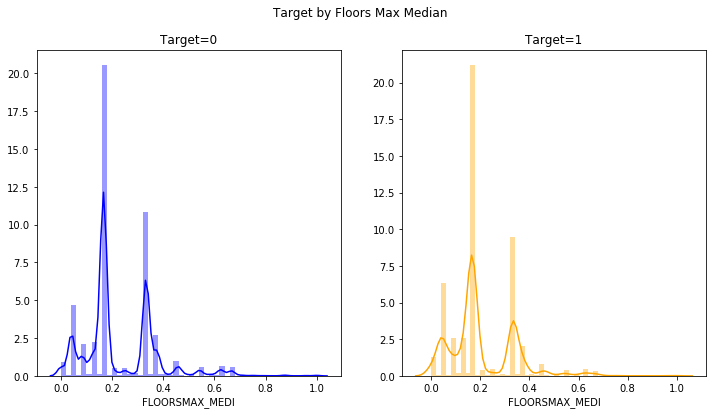

In [84]:
target_hist('FLOORSMAX_MEDI', 'Target by Floors Max Median')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='floors-min'></a>
## Floors Min
description : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

#### AVG

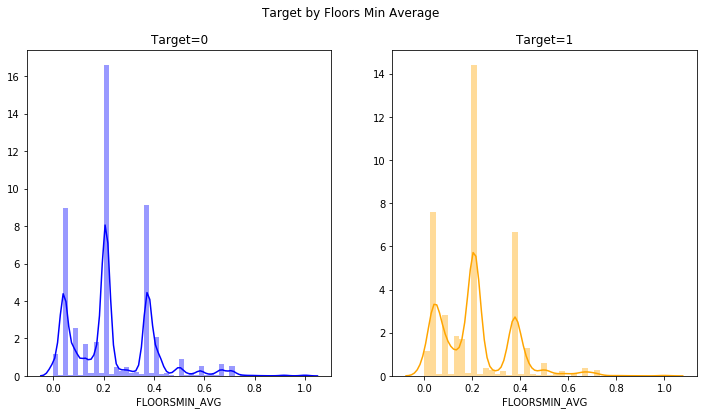

In [85]:
target_hist('FLOORSMIN_AVG', 'Target by Floors Min Average')

#### Mode

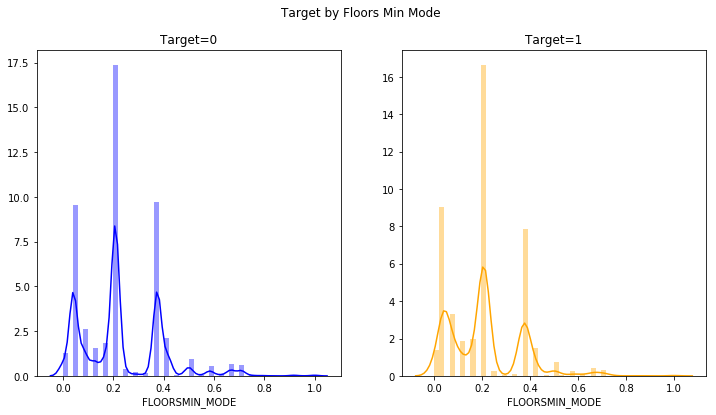

In [86]:
target_hist('FLOORSMIN_MODE', 'Target by Floors Min Mode')

#### Median

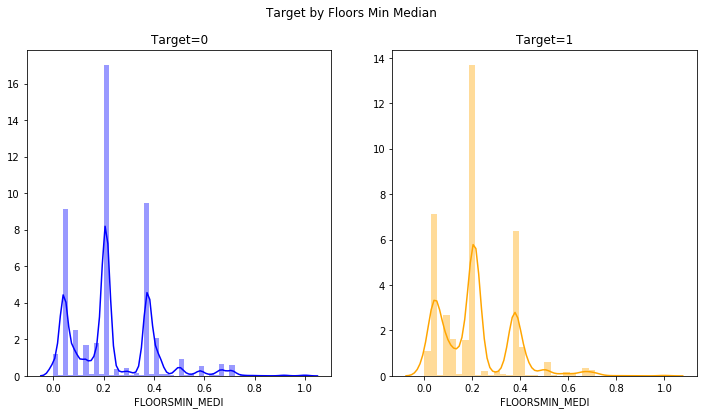

In [87]:
target_hist('FLOORSMIN_MEDI', 'Target by Floors Min Median')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='land-area'></a>
## Land Area
description : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

#### AVG

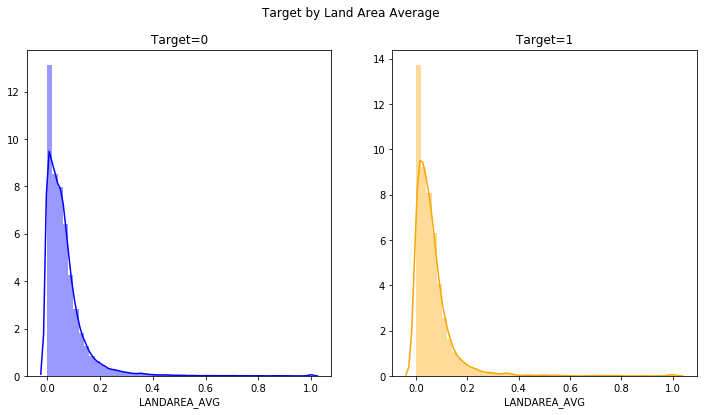

In [88]:
target_hist('LANDAREA_AVG', 'Target by Land Area Average')

#### Mode

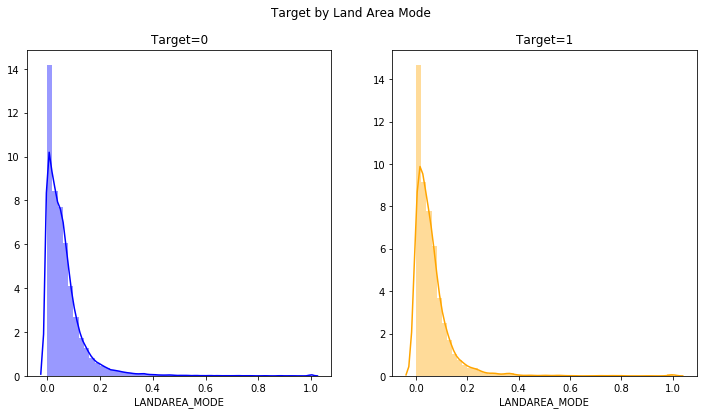

In [89]:
target_hist('LANDAREA_MODE', 'Target by Land Area Mode')

#### Median

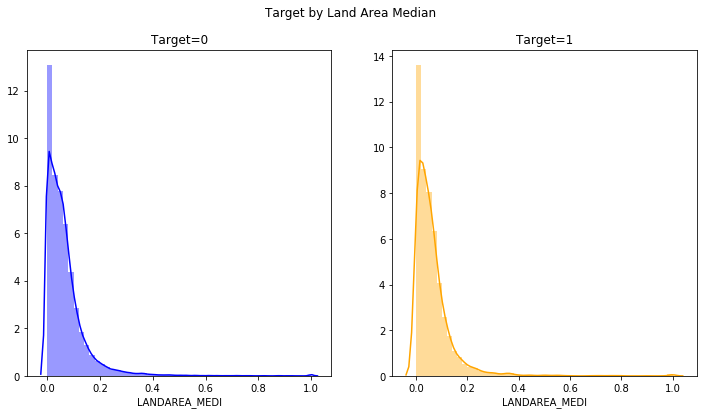

In [90]:
target_hist('LANDAREA_MEDI', 'Target by Land Area Median')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='living-apartments'></a>
## Living Apartments
description : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

#### AVG

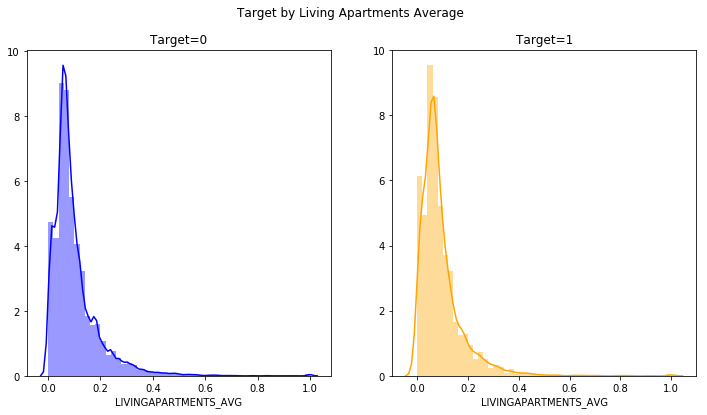

In [91]:
target_hist('LIVINGAPARTMENTS_AVG', 'Target by Living Apartments Average')

#### Mode

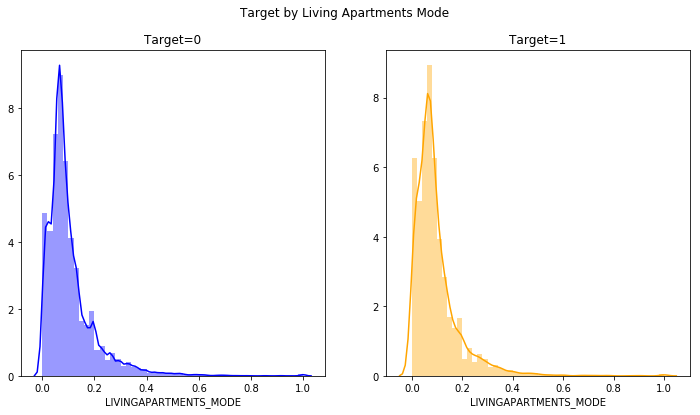

In [92]:
target_hist('LIVINGAPARTMENTS_MODE', 'Target by Living Apartments Mode')

#### Median

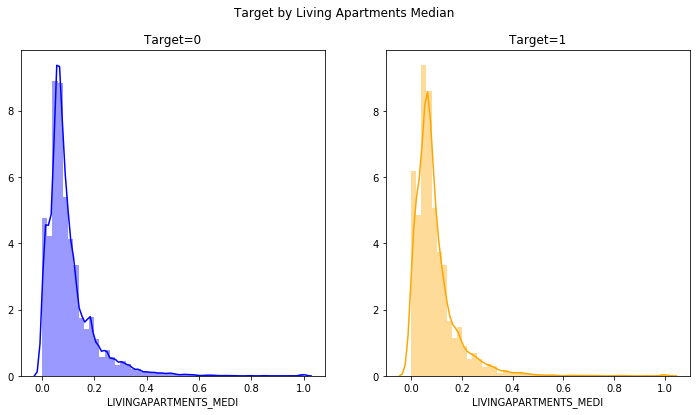

In [93]:
target_hist('LIVINGAPARTMENTS_MEDI', 'Target by Living Apartments Median')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='living-area'></a>
## Living Area
description : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

#### AVG

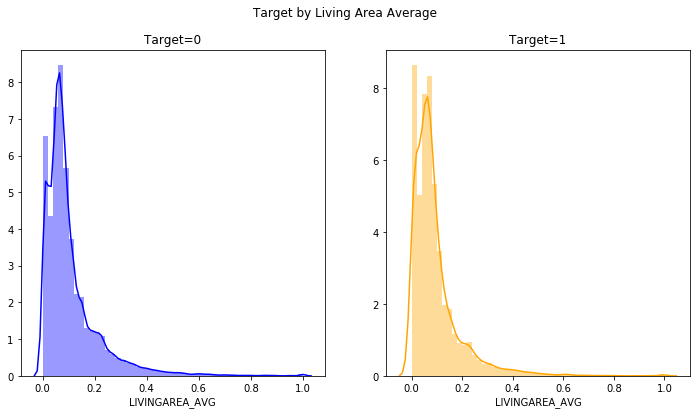

In [94]:
target_hist('LIVINGAREA_AVG', 'Target by Living Area Average')

#### Mode

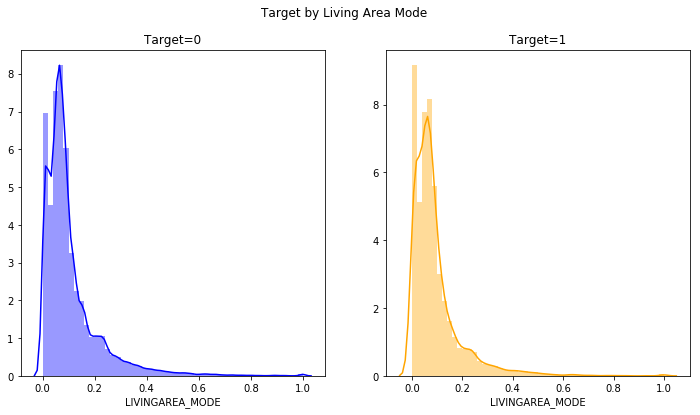

In [95]:
target_hist('LIVINGAREA_MODE', 'Target by Living Area Mode')

#### Median

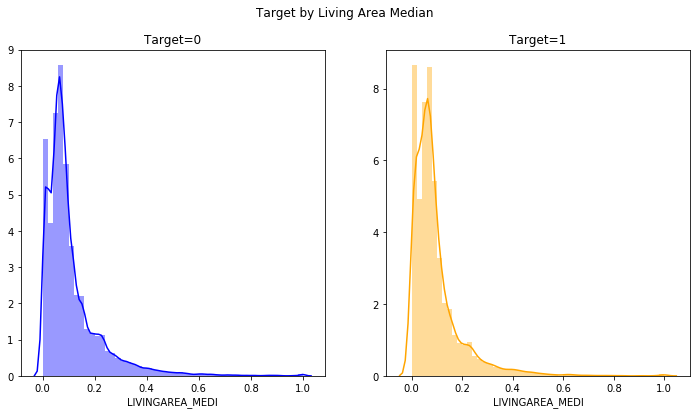

In [96]:
target_hist('LIVINGAREA_MEDI', 'Target by Living Area Median')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='non-living-apartments'></a>
## Non Living Apartments
description : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

#### AVG

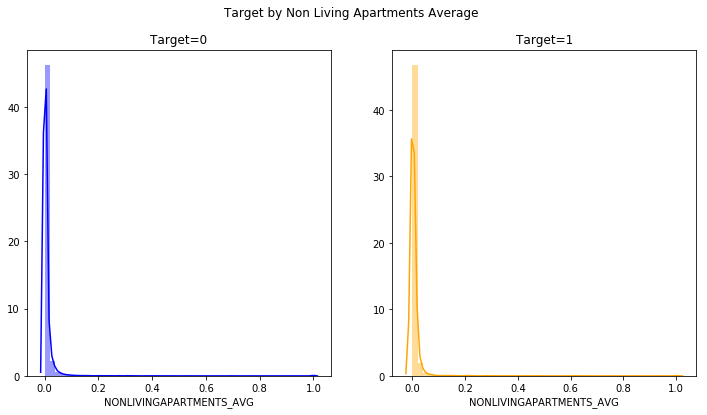

In [97]:
target_hist('NONLIVINGAPARTMENTS_AVG', 'Target by Non Living Apartments Average')

#### Mode

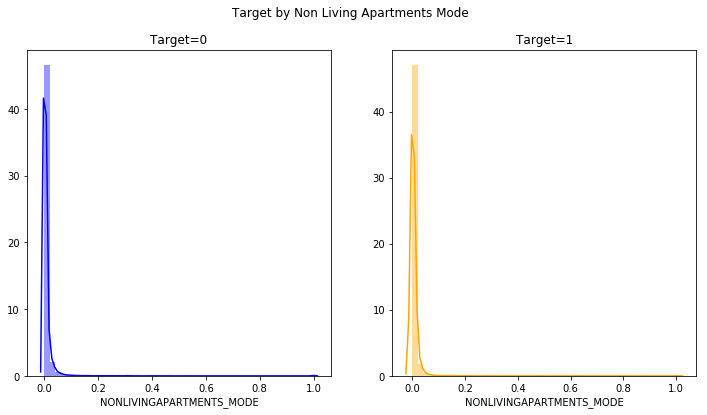

In [98]:
target_hist('NONLIVINGAPARTMENTS_MODE', 'Target by Non Living Apartments Mode')

#### Median

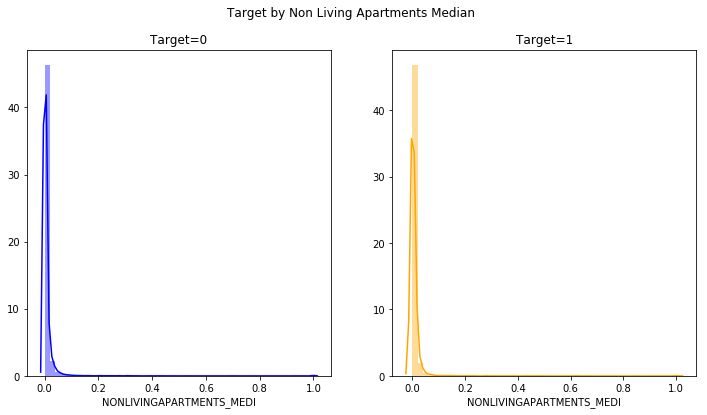

In [99]:
target_hist('NONLIVINGAPARTMENTS_MEDI', 'Target by Non Living Apartments Median')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='non-living-area'></a>
## Non Living Area
description : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

#### AVG

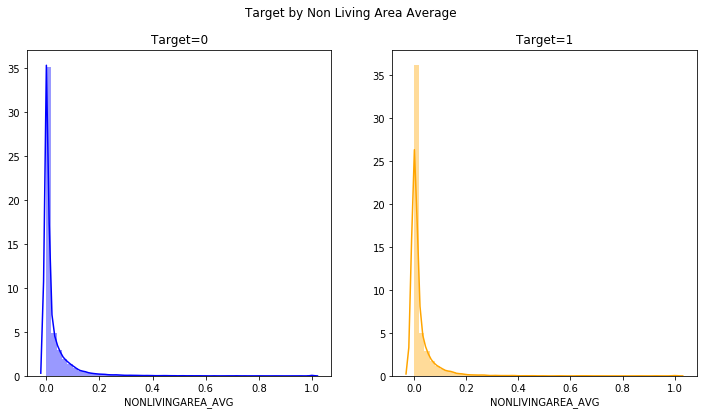

In [100]:
target_hist('NONLIVINGAREA_AVG', 'Target by Non Living Area Average')

#### Mode

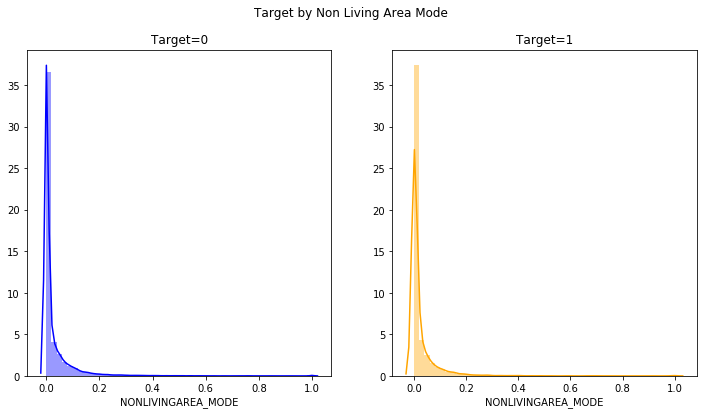

In [101]:
target_hist('NONLIVINGAREA_MODE', 'Target by Non Living Area Mode')

#### Median

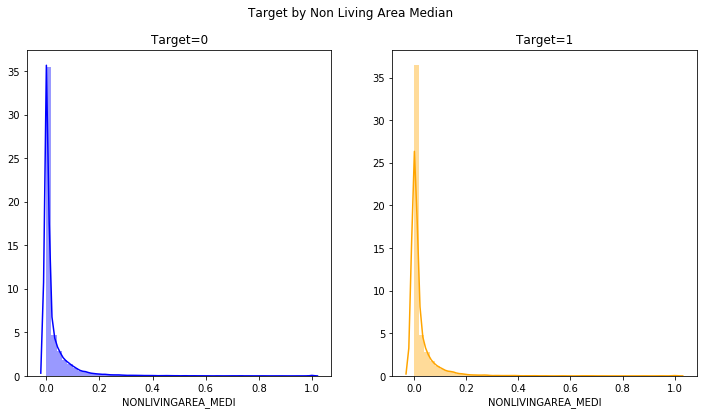

In [102]:
target_hist('NONLIVINGAREA_MEDI', 'Target by Non Living Area Median')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='fondkapremont'></a>
## Fondkapremont
description : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Fondkapremont = ブルガリア語で資金援助らしい

#### Mode

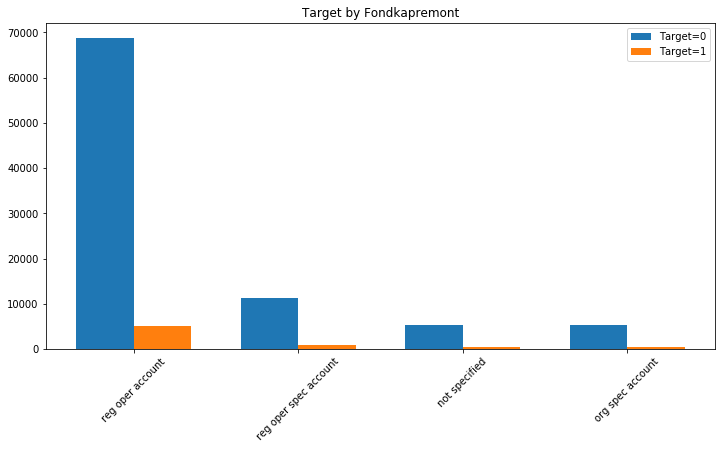

In [103]:
target_bar('FONDKAPREMONT_MODE', 'Target by Fondkapremont')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='house-type'></a>
## House Type
description : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

#### Mode

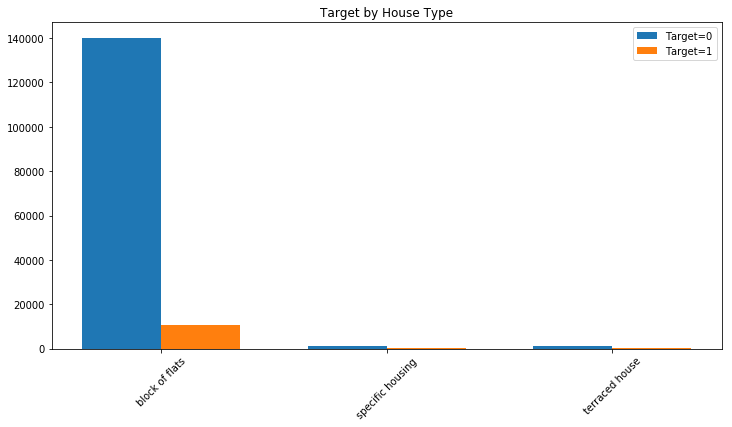

In [104]:
target_bar('HOUSETYPE_MODE', 'Target by House Type')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='total-area'></a>
## Total Area
description : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

#### Mode

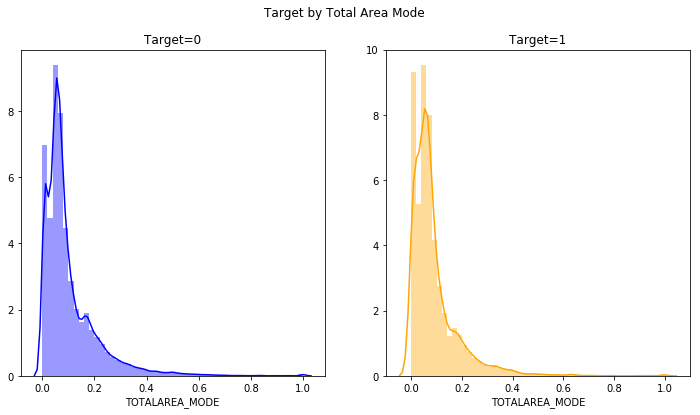

In [105]:
target_hist('TOTALAREA_MODE', 'Target by Total Area Mode')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='walls-material'></a>
## Walls Material
description : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

#### Mode

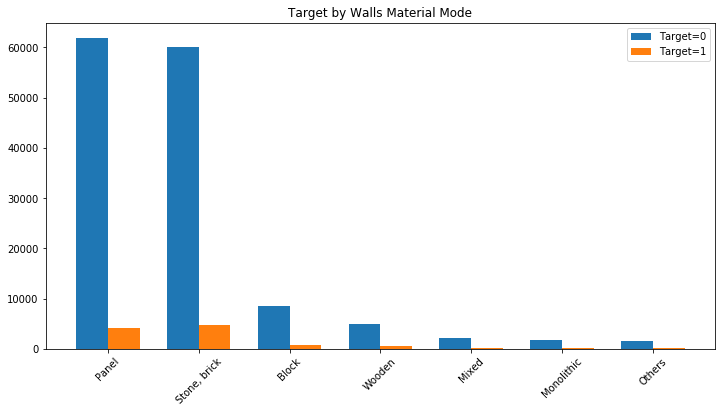

In [106]:
target_bar('WALLSMATERIAL_MODE', 'Target by Walls Material Mode')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='emergency-state'></a>
## Emergency State
description : Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

#### Mode

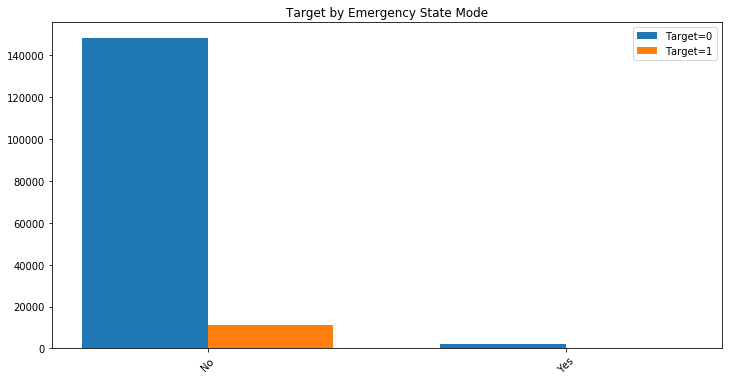

In [107]:
target_bar('EMERGENCYSTATE_MODE', 'Target by Emergency State Mode')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='observation-days-past-due'></a>
## Observation Days Past Due

description : How many observation of client's social surroundings with observable DPD (days past due) default

周りの経済状況的なそれ

#### OBS_30_CNT_SOCIAL_CIRCLE

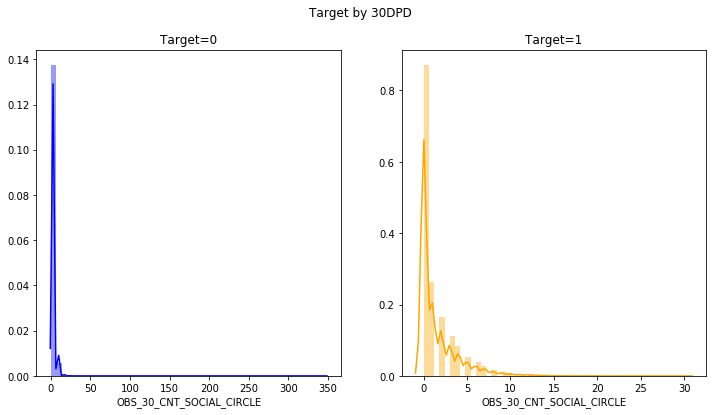

In [108]:
target_hist('OBS_30_CNT_SOCIAL_CIRCLE', 'Target by 30DPD')

#### OBS_60_CNT_SOCIAL_CIRCLE

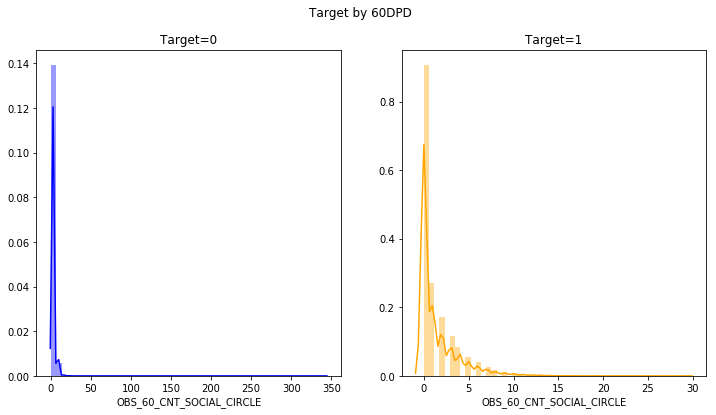

In [109]:
target_hist('OBS_60_CNT_SOCIAL_CIRCLE', 'Target by 60DPD')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='observation-defaulted-days-past-due'></a>
## Observation Defaulted Days Past Due 

description : How many observation of client's social surroundings defaulted on 30 DPD (days past due) 

#### DEF_30_CNT_SOCIAL_CIRCLE

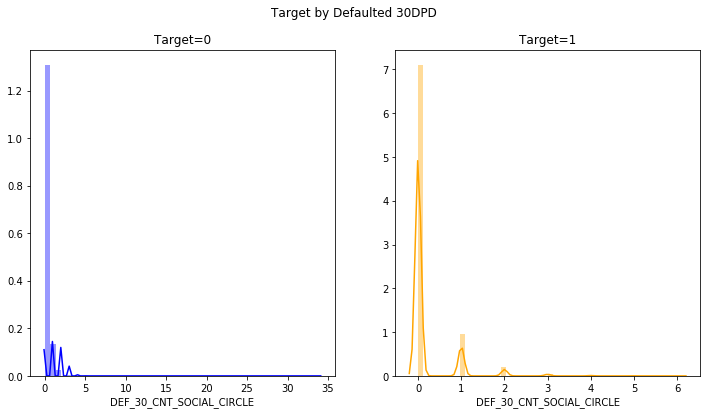

In [110]:
target_hist('DEF_30_CNT_SOCIAL_CIRCLE', 'Target by Defaulted 30DPD')

#### DEF_60_CNT_SOCIAL_CIRCLE

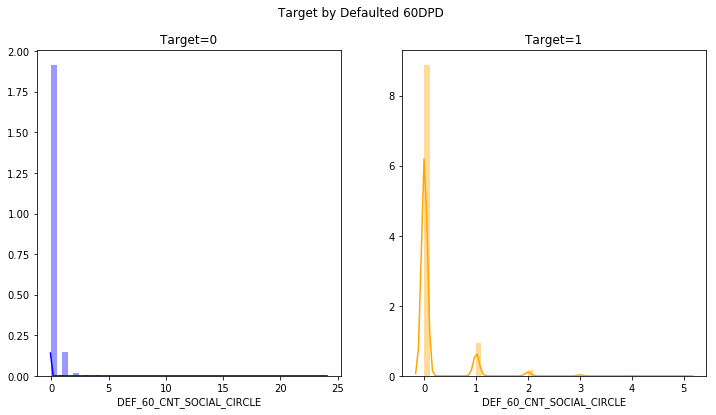

In [111]:
target_hist('DEF_60_CNT_SOCIAL_CIRCLE', 'Target by Defaulted 60DPD')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='days-last-phone-change'></a>
## Days Last Phone Change

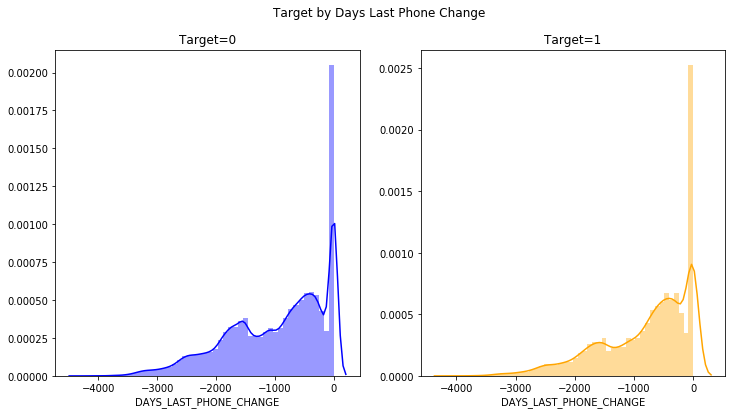

In [112]:
target_hist('DAYS_LAST_PHONE_CHANGE', 'Target by Days Last Phone Change')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id='flag-document'></a>
## Flag Document

Did client provide document

#### Document 2

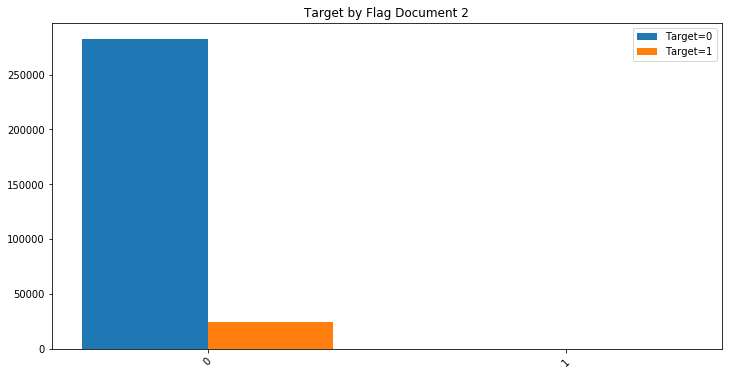

In [113]:
target_bar('FLAG_DOCUMENT_2', 'Target by Flag Document 2')

In [114]:
print((app_trn.FLAG_DOCUMENT_2 == 1).sum(),
      (app_tst.FLAG_DOCUMENT_2 == 1).sum())

13 0


In [115]:
app_trn[app_trn.FLAG_DOCUMENT_2==1].TARGET

23923     0
33976     1
79252     0
87010     1
98999     0
109258    0
186302    0
187327    1
240334    1
247300    0
252170    0
282657    0
294910    0
Name: TARGET, dtype: int64

FLAG_DOCUMENT_2==1の時にTARGET=1の割合多い

#### Document 3

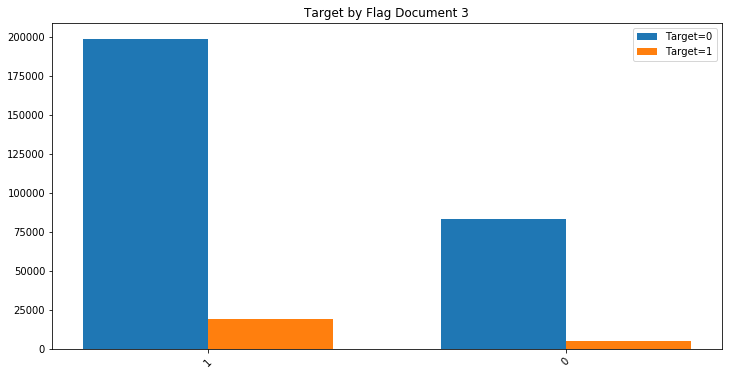

In [116]:
target_bar('FLAG_DOCUMENT_3', 'Target by Flag Document 3')

#### Document 4
なくしても良い特徴量ではないか

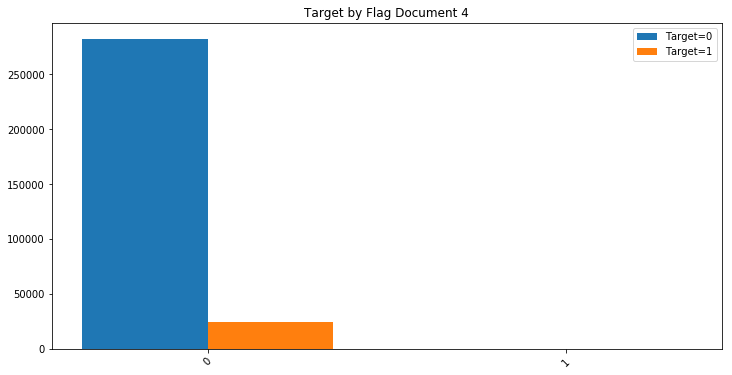

In [117]:
target_bar('FLAG_DOCUMENT_4', 'Target by Flag Document 4')

In [118]:
print((app_trn.FLAG_DOCUMENT_4 == 1).sum(),
      (app_tst.FLAG_DOCUMENT_4 == 1).sum())

25 5


In [119]:
app_trn[app_trn.FLAG_DOCUMENT_4==1].TARGET

5896      0
6928      0
14306     0
18890     0
18978     0
29787     0
34485     0
44210     0
47434     0
58520     0
68590     0
71182     0
71348     0
99378     0
106895    0
119245    0
125017    0
129294    0
179741    0
222201    0
236631    0
254119    0
271220    0
285948    0
305368    0
Name: TARGET, dtype: int64

全部0なのでこの特徴量使わなくて良いのでは？

#### Document 5

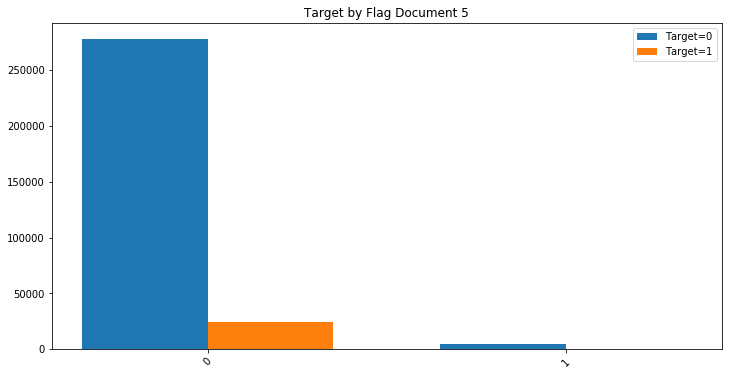

In [120]:
target_bar('FLAG_DOCUMENT_5', 'Target by Flag Document 5')

#### Document 6

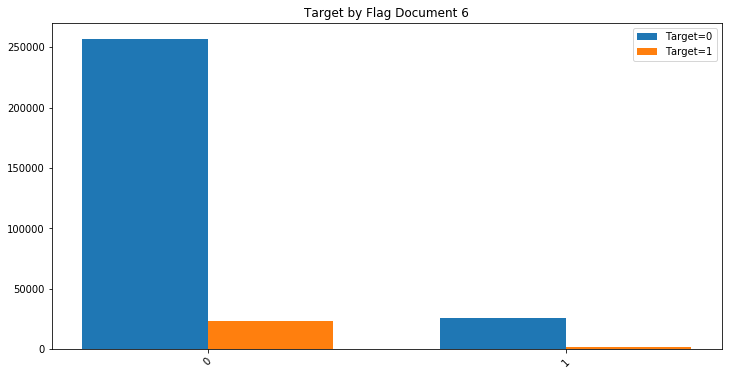

In [121]:
target_bar('FLAG_DOCUMENT_6', 'Target by Flag Document 6')

#### Document 7

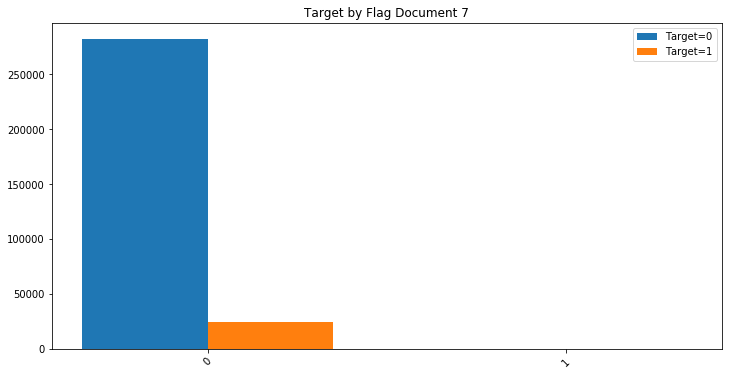

In [122]:
target_bar('FLAG_DOCUMENT_7', 'Target by Flag Document 7')

In [123]:
print((app_trn.FLAG_DOCUMENT_7 == 1).sum(),
      (app_tst.FLAG_DOCUMENT_7 == 1).sum())

59 2


In [124]:
app_trn[app_trn.FLAG_DOCUMENT_7==1].TARGET.sum()

3

#### Document 8

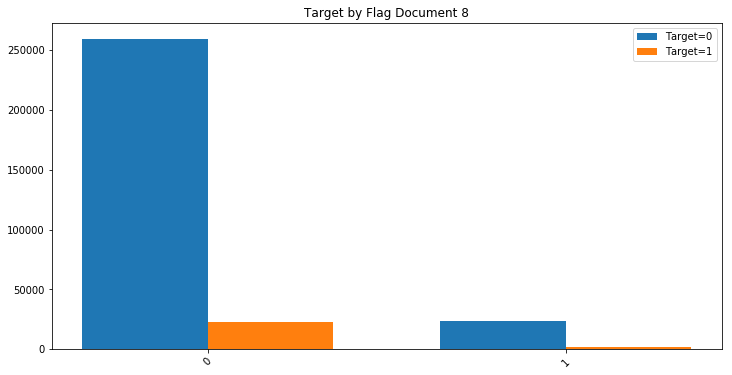

In [125]:
target_bar('FLAG_DOCUMENT_8', 'Target by Flag Document 8')

#### Document 9

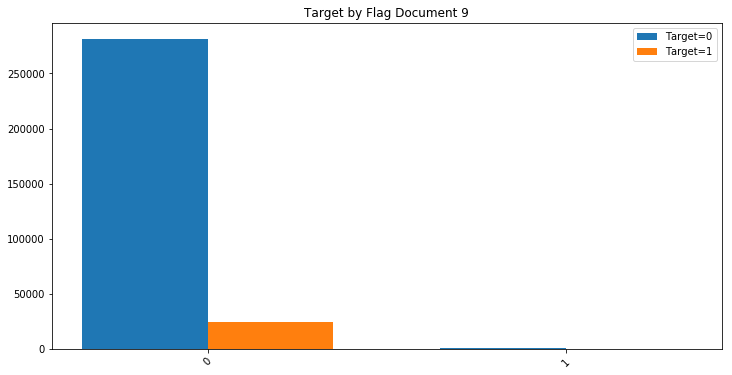

In [126]:
target_bar('FLAG_DOCUMENT_9', 'Target by Flag Document 9')

#### Document 10

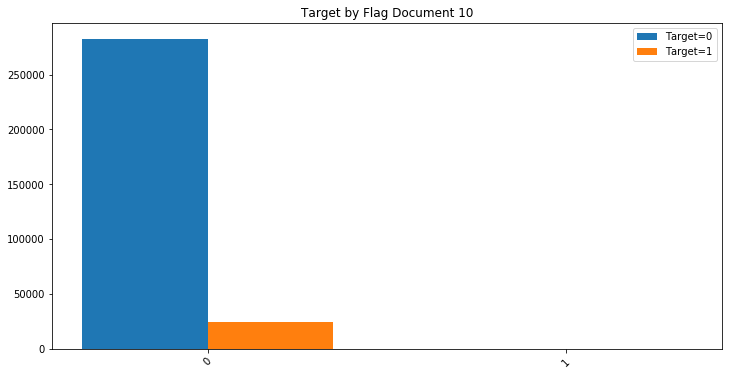

In [127]:
target_bar('FLAG_DOCUMENT_10', 'Target by Flag Document 10')

In [128]:
print((app_trn.FLAG_DOCUMENT_10 == 1).sum(),
      (app_tst.FLAG_DOCUMENT_10 == 1).sum())

7 0


In [129]:
app_trn[app_trn.FLAG_DOCUMENT_10 == 1].TARGET.sum()

0

全部0だしこの特徴量もいらないのでは？

#### Document 11

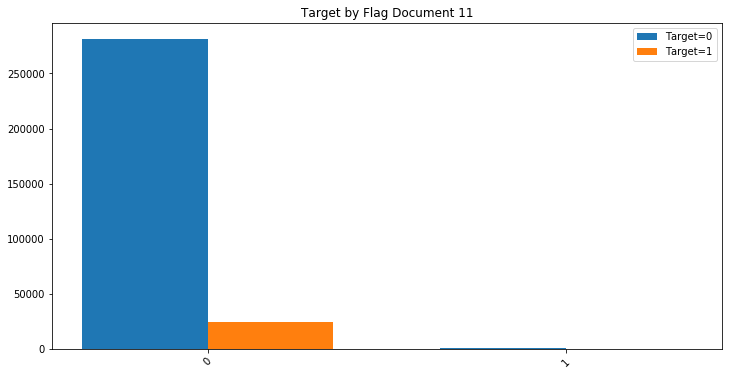

In [130]:
target_bar('FLAG_DOCUMENT_11', 'Target by Flag Document 11')

#### Document 12

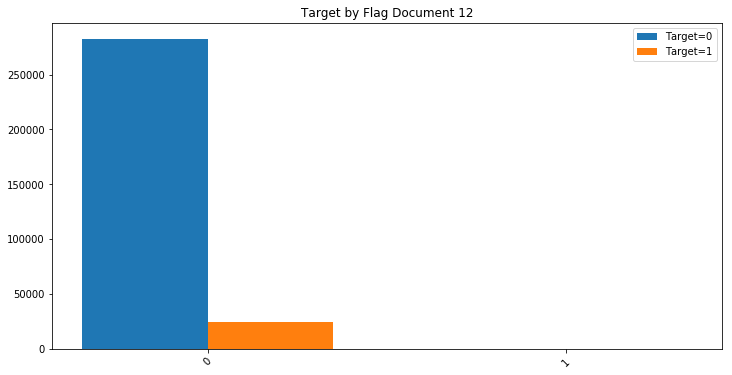

In [131]:
target_bar('FLAG_DOCUMENT_12', 'Target by Flag Document 12')

In [132]:
print((app_trn.FLAG_DOCUMENT_12 == 1).sum(),
      (app_tst.FLAG_DOCUMENT_12 == 1).sum())

2 0


In [133]:
app_trn[app_trn.FLAG_DOCUMENT_12 == 1].TARGET.sum()

0

これまじでいらないのでは？

#### Document 13

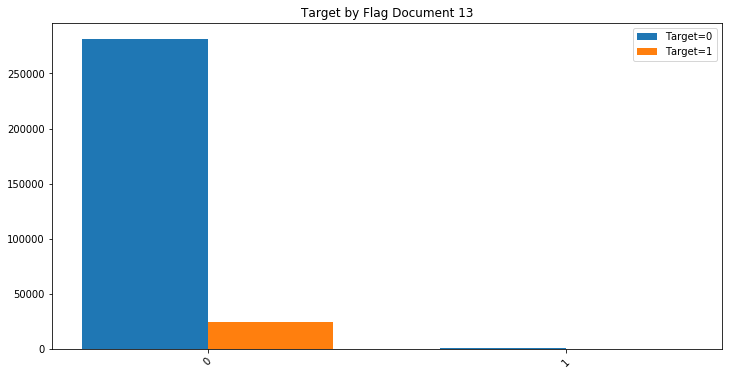

In [134]:
target_bar('FLAG_DOCUMENT_13', 'Target by Flag Document 13')

#### Document 14

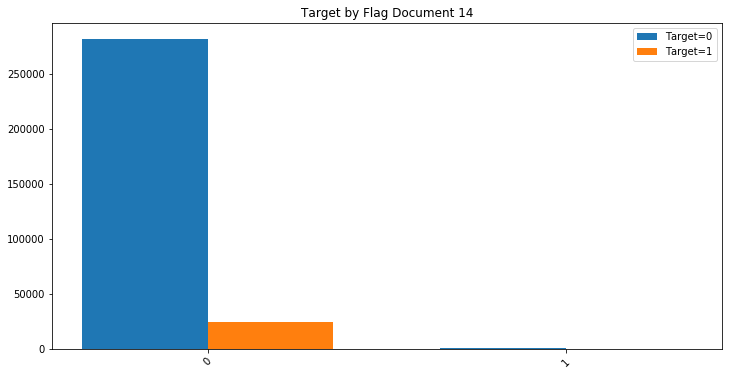

In [135]:
target_bar('FLAG_DOCUMENT_14', 'Target by Flag Document 14')

#### Document 15

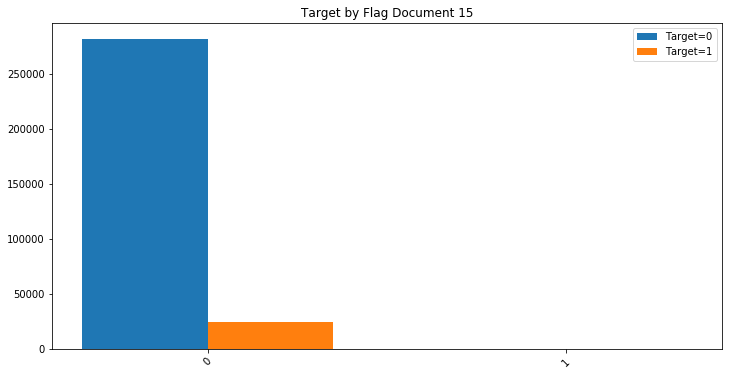

In [136]:
target_bar('FLAG_DOCUMENT_15', 'Target by Flag Document 15')

In [137]:
print((app_trn.FLAG_DOCUMENT_15 == 1).sum(),
      (app_tst.FLAG_DOCUMENT_15 == 1).sum())

372 0


In [138]:
app_trn[app_trn.FLAG_DOCUMENT_15 == 1].TARGET.sum()

11

#### Document 16

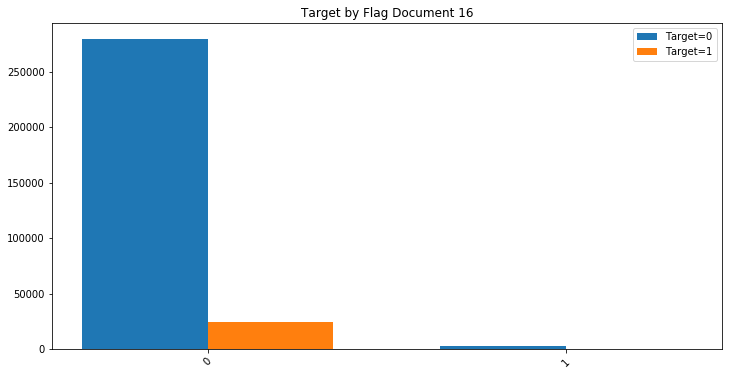

In [139]:
target_bar('FLAG_DOCUMENT_16', 'Target by Flag Document 16')

#### Document 17

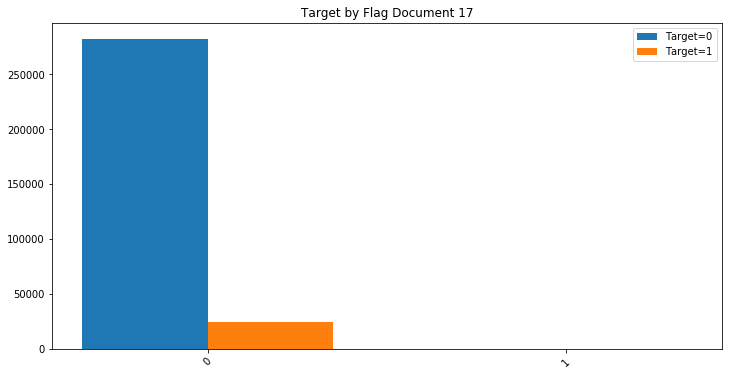

In [140]:
target_bar('FLAG_DOCUMENT_17', 'Target by Flag Document 17')

In [141]:
print((app_trn.FLAG_DOCUMENT_17 == 1).sum(),
      (app_tst.FLAG_DOCUMENT_17 == 1).sum())

82 0


In [142]:
app_trn[app_trn.FLAG_DOCUMENT_17 == 1].TARGET.sum()

2

#### Document 18

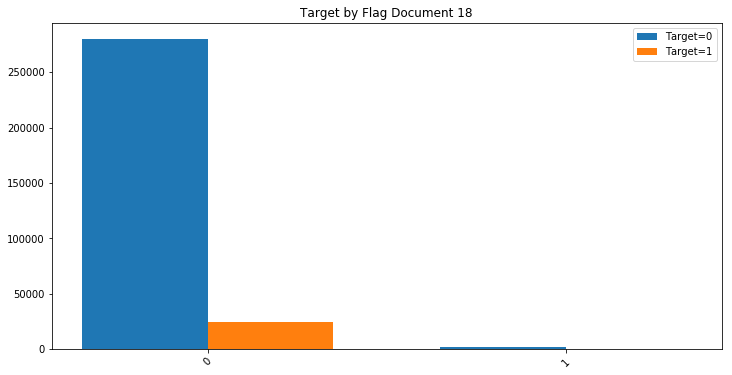

In [143]:
target_bar('FLAG_DOCUMENT_18', 'Target by Flag Document 18')

#### Document 19

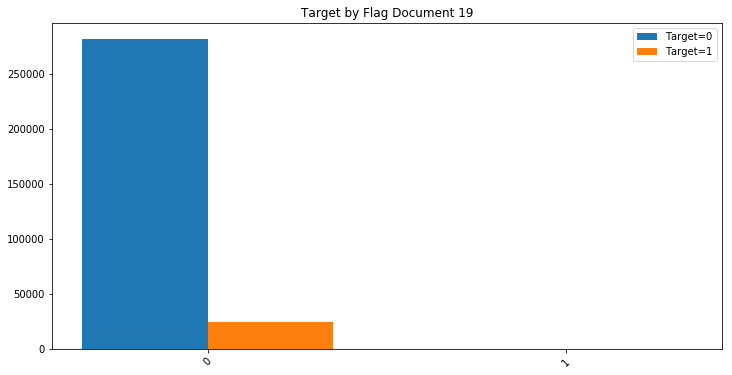

In [144]:
target_bar('FLAG_DOCUMENT_19', 'Target by Flag Document 19')

In [145]:
print((app_trn.FLAG_DOCUMENT_19 == 1).sum(),
      (app_tst.FLAG_DOCUMENT_19 == 1).sum())

183 0


In [146]:
app_trn[app_trn.FLAG_DOCUMENT_19 == 1].TARGET.sum()

12

#### Document 20

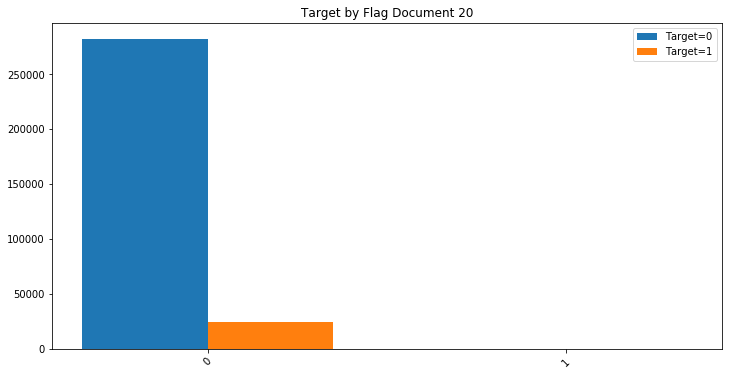

In [147]:
target_bar('FLAG_DOCUMENT_20', 'Target by Flag Document 20')

In [148]:
print((app_trn.FLAG_DOCUMENT_20 == 1).sum(),
      (app_tst.FLAG_DOCUMENT_20 == 1).sum())

156 0


In [149]:
app_trn[app_trn.FLAG_DOCUMENT_20 == 1].TARGET.sum()

13

#### Document 21

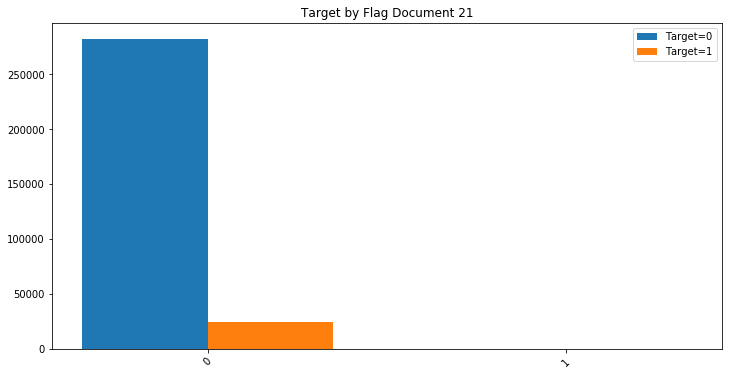

In [150]:
target_bar('FLAG_DOCUMENT_21', 'Target by Flag Document 21')

In [151]:
print((app_trn.FLAG_DOCUMENT_21 == 1).sum(),
      (app_tst.FLAG_DOCUMENT_21 == 1).sum())

103 0


In [152]:
app_trn[app_trn.FLAG_DOCUMENT_21 == 1].TARGET.sum()

14

<div style="text-align: right;">
[back to top](#top)
</div>

<a id=amt-req-credit-bureau-hour></a>

## Amount Request Credit Bureau Hour


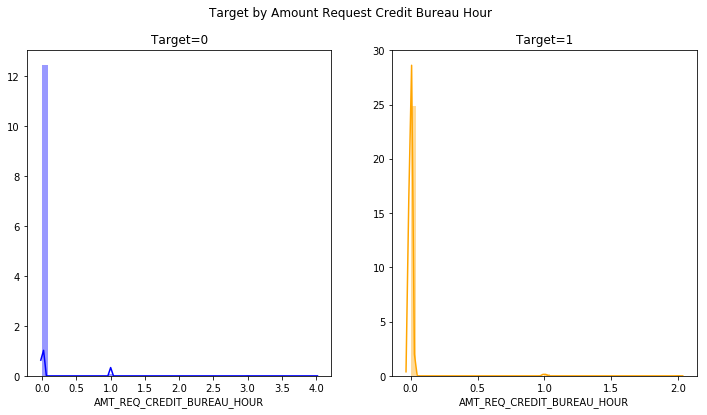

In [153]:
target_hist('AMT_REQ_CREDIT_BUREAU_HOUR', 'Target by Amount Request Credit Bureau Hour')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id=amt-req-credit-bureau-day></a>

## Amount Request Credit Bureau Day


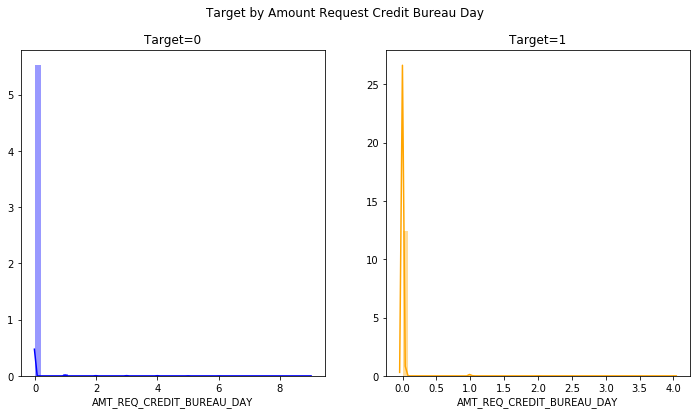

In [154]:
target_hist('AMT_REQ_CREDIT_BUREAU_DAY', 'Target by Amount Request Credit Bureau Day')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id=amt-req-credit-bureau-week></a>

## Amount Request Credit Bureau Week


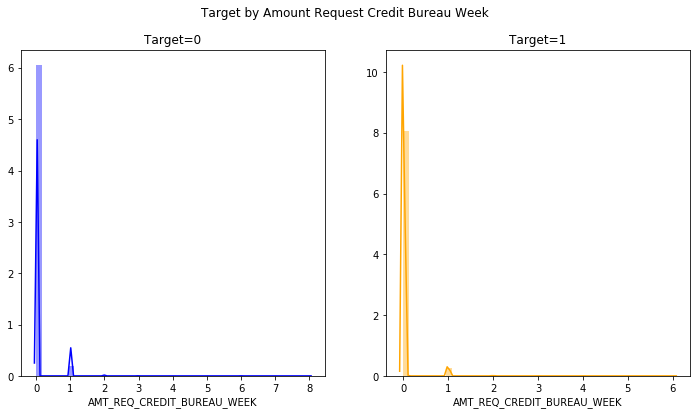

In [155]:
target_hist('AMT_REQ_CREDIT_BUREAU_WEEK', 'Target by Amount Request Credit Bureau Week')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id=amt-req-credit-bureau-mon></a>

## Amount Request Credit Bureau Month

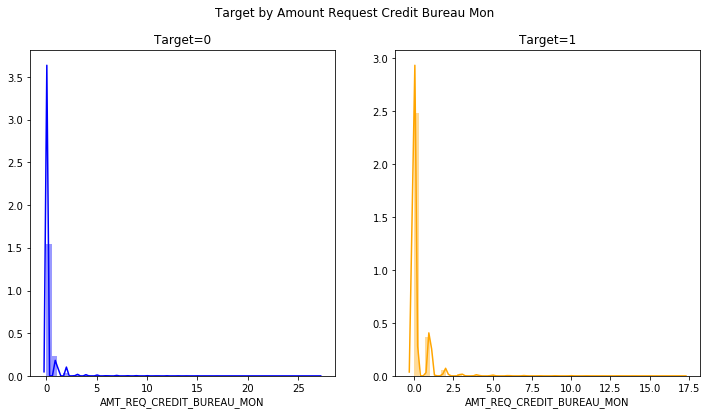

In [156]:
target_hist('AMT_REQ_CREDIT_BUREAU_MON', 'Target by Amount Request Credit Bureau Mon')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id=amt-req-credit-bureau-qrt></a>

## Amount Request Credit Bureau  Quater


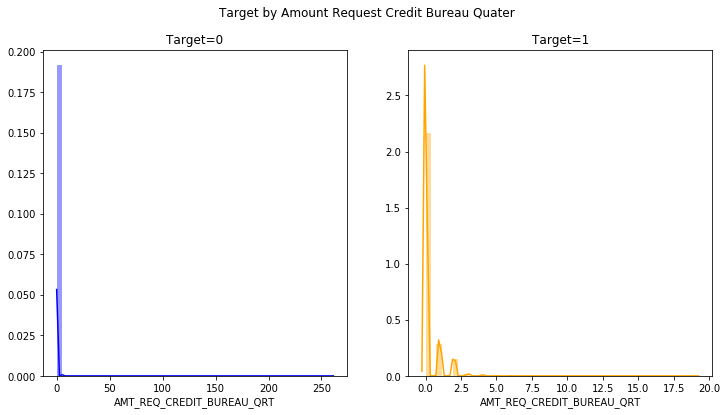

In [157]:
target_hist('AMT_REQ_CREDIT_BUREAU_QRT', 'Target by Amount Request Credit Bureau Quater')

<div style="text-align: right;">
[back to top](#top)
</div>

<a id=amt-req-credit-bureau-year></a>

## Amount Request Credit Bureau  Year


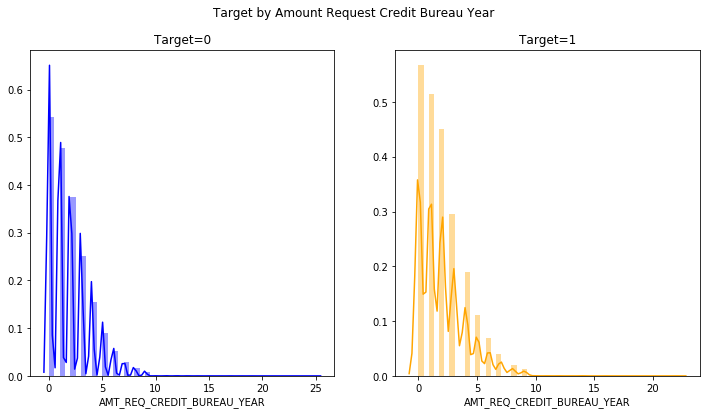

In [158]:
target_hist('AMT_REQ_CREDIT_BUREAU_YEAR', 'Target by Amount Request Credit Bureau Year')

<div style="text-align: right;">
[back to top](#top)
</div>